In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
import seaborn as sb

In [5]:
import missingno as mssno

In [6]:
%matplotlib inline

In [7]:
train=pd.read_csv("E:/DataScience/Kaggle_Datasets/Porto_Seguros_Safe_Driver_Prediction/train.csv")

In [8]:
test=pd.read_csv("E:/DataScience/Kaggle_Datasets/Porto_Seguros_Safe_Driver_Prediction/test.csv")

In [9]:
train.head(10)

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
0   7       0          2              2          5              1   
1   9       0          1              1          7              0   
2  13       0          5              4          9              1   
3  16       0          0              1          2              0   
4  17       0          0              2          0              1   
5  19       0          5              1          4              0   
6  20       0          2              1          3              1   
7  22       0          5              1          4              0   
8  26       0          5              1          3              1   
9  28       1          1              1          2              0   

   ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin       ...        \
0              0              0              1              0       ...         
1              0              0              0              1       ...         
2              0              0              0              1       ...         
3              0              1              0              0       ...         
4              0              1              0              0       ...         
5              0              0              0              0       ...         
6              0              0              1              0       ...         
7              0              1              0              0       ...         
8              0              0              0              1       ...         
9              0              0              1              0       ...         

   ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
0           9           1           5           8               0   
1           3           1           1           9               0   
2           4           2           7           7               0   
3           2           2           4           9               0   
4           3           1           1           3               0   
5           4           2           0           9               0   
6           3           0           0          10               0   
7           7           1           3           6               1   
8           4           2           1           5               0   
9           3           5           0           6               0   

   ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
0               1               1               0               0   
1               1               1               0               1   
2               1               1               0               1   
3               0               0               0               0   
4               0               0               1               1   
5               1               0               1               1   
6               1               0               0               1   
7               0               1               0               1   
8               1               0               0               0   
9               1               0               0               1   

   ps_calc_20_bin  
0               1  
1               0  
2               0  
3               0  
4               0  
5               1  
6               0  
7               0  
8               1  
9               0  

[10 rows x 59 columns]

In [10]:
test.head()

id  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  ps_ind_05_cat  \
0   0          0              1          8              1              0   
1   1          4              2          5              1              0   
2   2          5              1          3              0              0   
3   3          0              1          6              0              0   
4   4          5              1          7              0              0   

   ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ps_ind_09_bin       ...        \
0              0              1              0              0       ...         
1              0              0              0              1       ...         
2              0              0              0              1       ...         
3              1              0              0              0       ...         
4              0              0              0              1       ...         

   ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
0           1           1           1          12               0   
1           2           0           3          10               0   
2           4           0           2           4               0   
3           5           1           0           5               1   
4           4           0           0           4               0   

   ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
0               1               1               0               0   
1               0               1               1               0   
2               0               0               0               0   
3               0               1               0               0   
4               1               1               0               0   

   ps_calc_20_bin  
0               1  
1               1  
2               0  
3               0  
4               1  

[5 rows x 58 columns]

In [11]:
train.drop_duplicates()

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
0             7       0          2              2          5              1   
1             9       0          1              1          7              0   
2            13       0          5              4          9              1   
3            16       0          0              1          2              0   
4            17       0          0              2          0              1   
5            19       0          5              1          4              0   
6            20       0          2              1          3              1   
7            22       0          5              1          4              0   
8            26       0          5              1          3              1   
9            28       1          1              1          2              0   
10           34       0          5              2          2              0   
11           35       0          2              1          3              1   
12           36       0          2              1          1              1   
13           43       0          1              1          3              1   
14           46       0          5              1         11              0   
15           48       0          5              1          3              1   
16           50       0          1              2          1              0   
17           58       0          5              1          6              0   
18           61       0          5              1          8              0   
19           64       1          0              1          2              1   
20           65       0          0              1          2              0   
21           66       0          0              1          5              1   
22           72       0          5              3          6              1   
23           74       0          2              1          2              1   
24           77       0          0              1          2              0   
25           78       0          0              1          7              0   
26           79       0          0              1          4              1   
27           80       0          4              1          6              0   
28           84       1          0              2          0              1   
29           85       0          3              2          2              0   
...         ...     ...        ...            ...        ...            ...   
595182  1487945       0          0              1          2              0   
595183  1487951       0          1              1          9              0   
595184  1487952       0          1              1          5              0   
595185  1487954       0          0              2          8              1   
595186  1487957       0          0              1          3              1   
595187  1487958       0          0              1          7              0   
595188  1487962       0          2              1          3              0   
595189  1487963       0          3              1          9              0   
595190  1487964       0          1              2          3              0   
595191  1487968       0          5              1          3              0   
595192  1487973       0          0              1          1              0   
595193  1487975       0          0              2          0              0   
595194  1487976       0          0              1          7              1   
595195  1487980       0          0              3          3              1   
595196  1487983       0          1              1          2              0   
595197  1487988       0          1              1          7              1   
595198  1487990       0          5              1          7              1   
595199  1487992       0          3              1          3              1   
595200  1487994       0          1              1          1   

In [12]:
train.shape

(595212, 59)

In [13]:
af = train.columns.tolist()

In [14]:
af.remove('target')

In [15]:
nf = [x for x in af if x[-3:] not in ['bin', 'cat']]

In [16]:
cf = [x for x in af if x[-3:]=='cat']

In [17]:
bf = [x for x in af if x[-3:]=='bin']

C:\Users\raksh\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


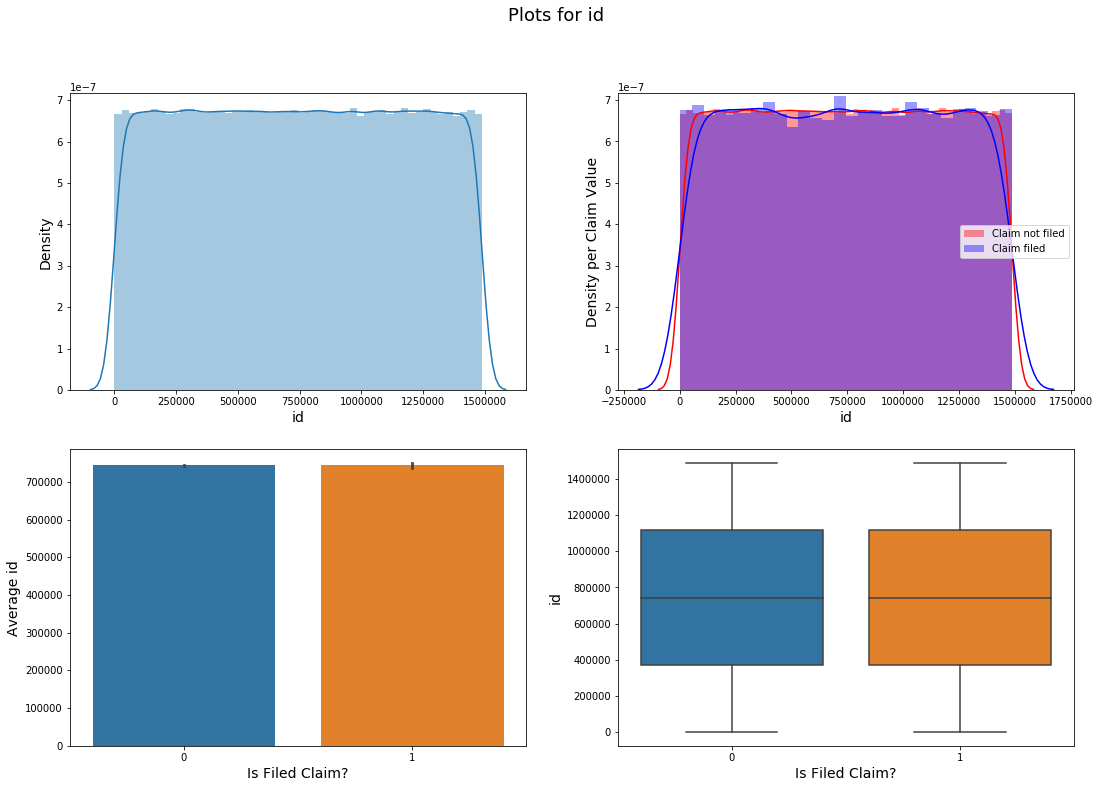

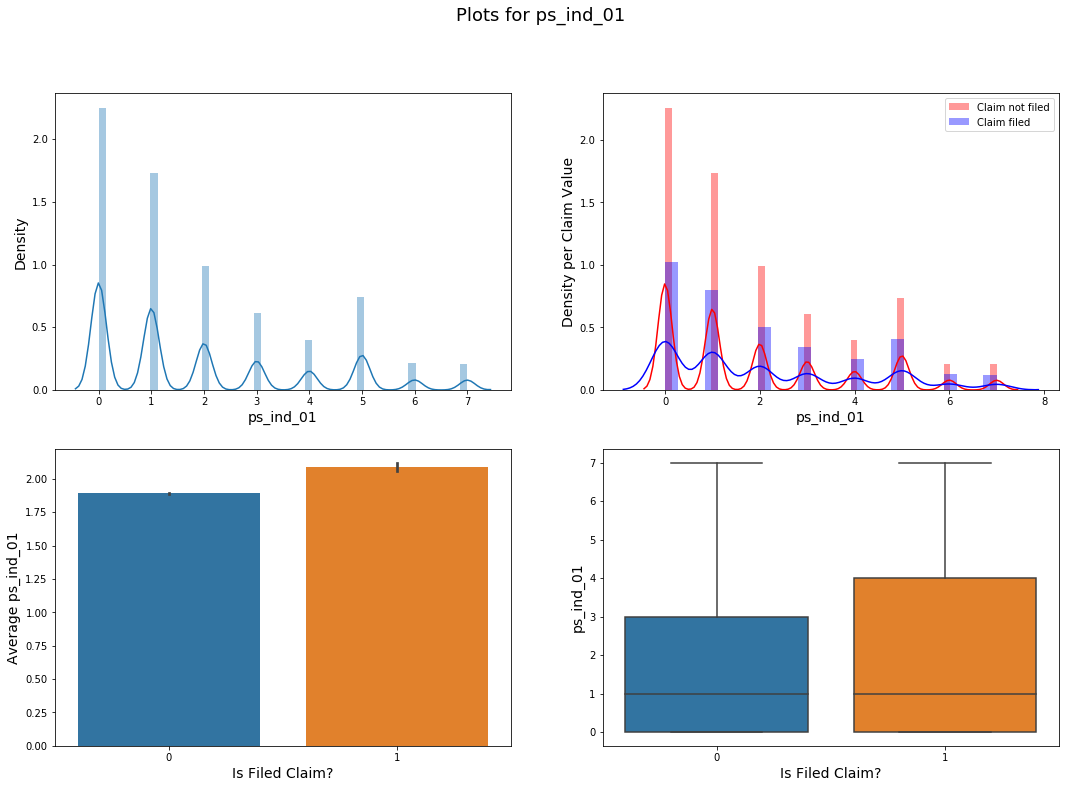

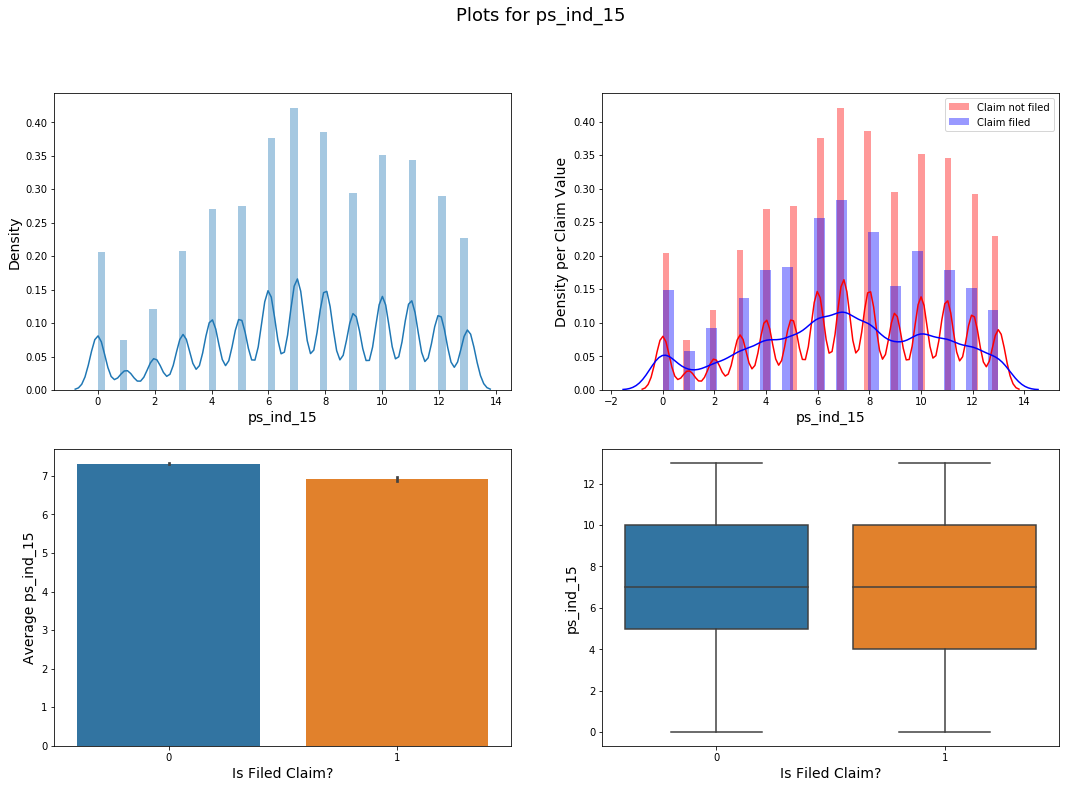

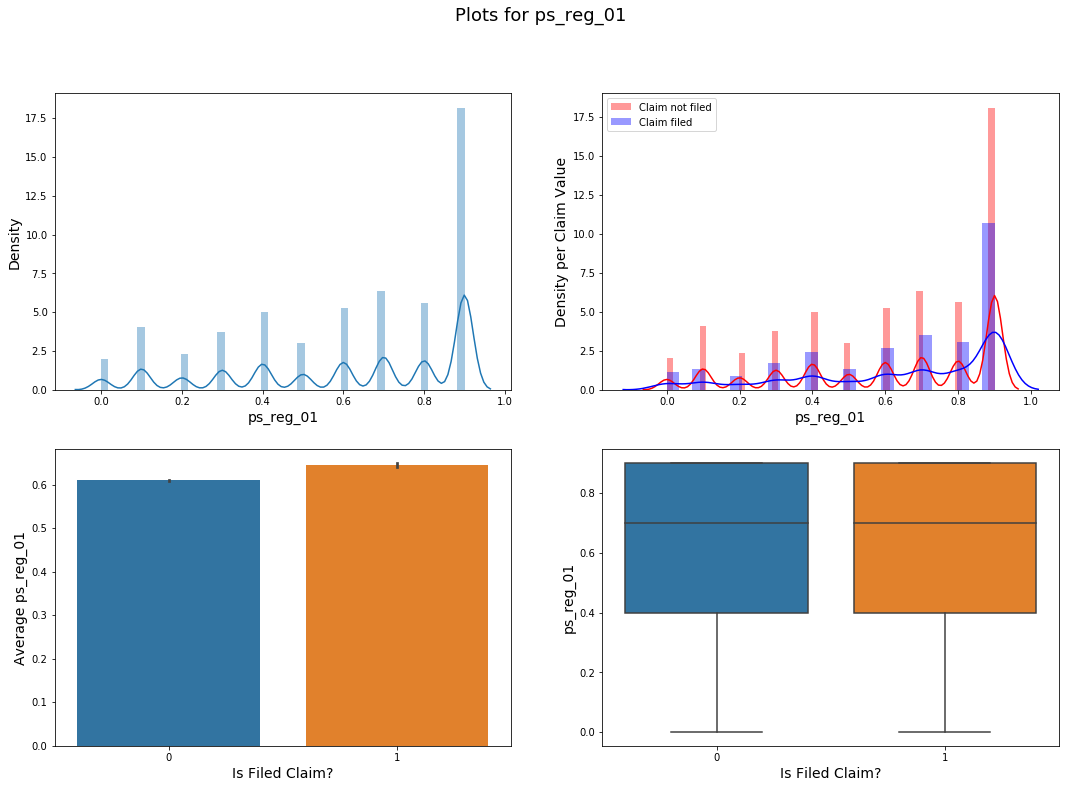

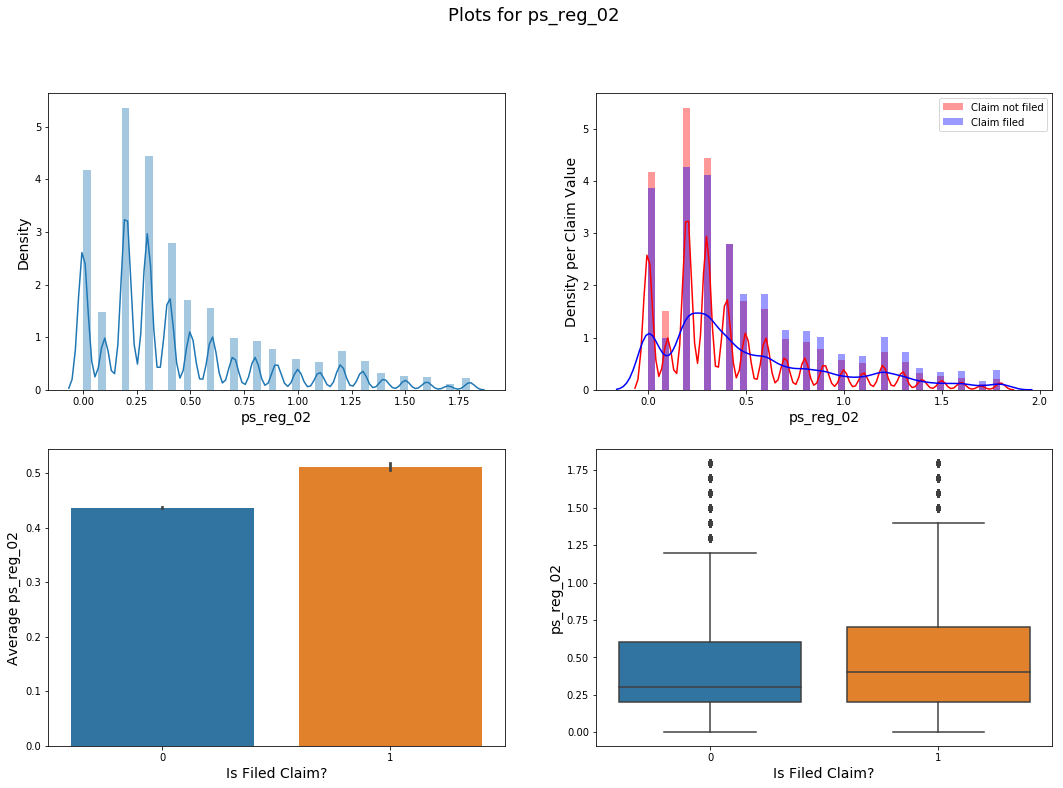

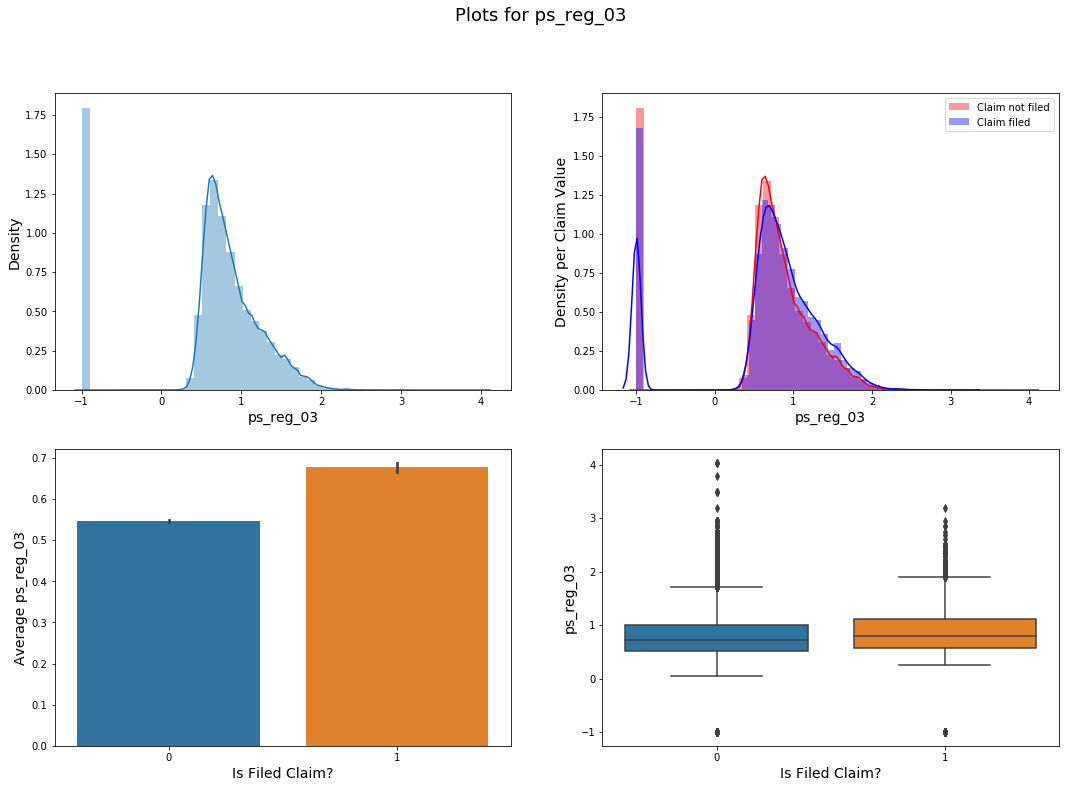

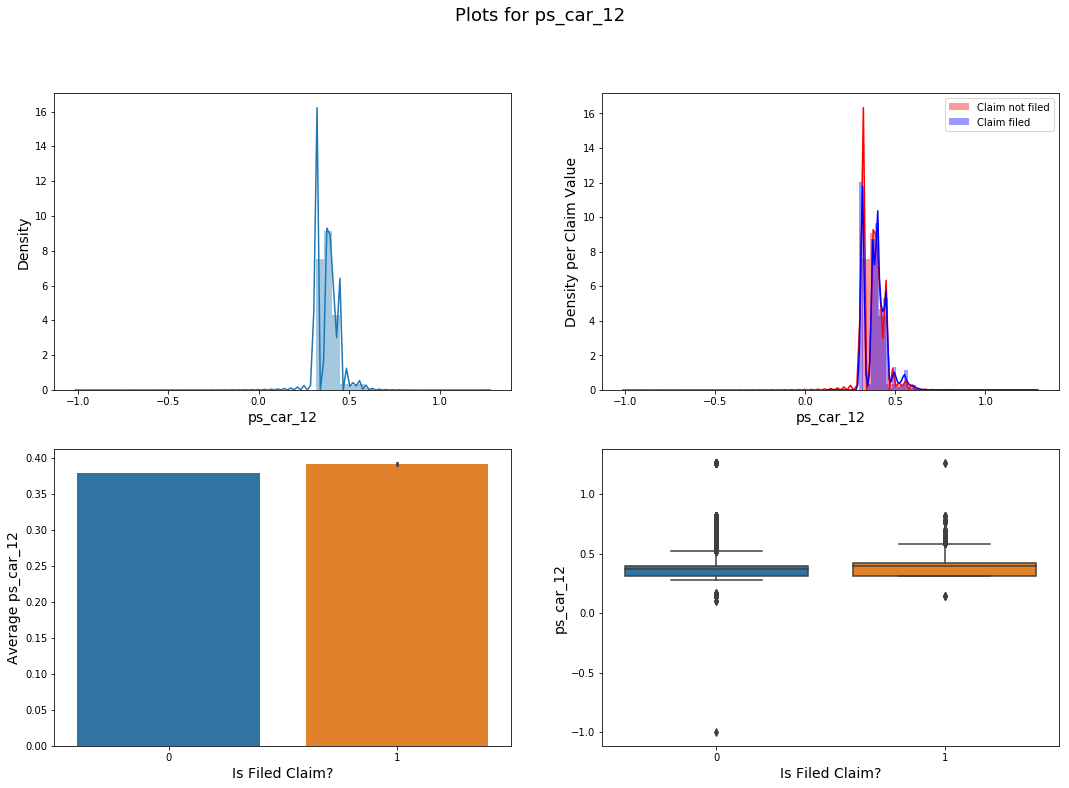

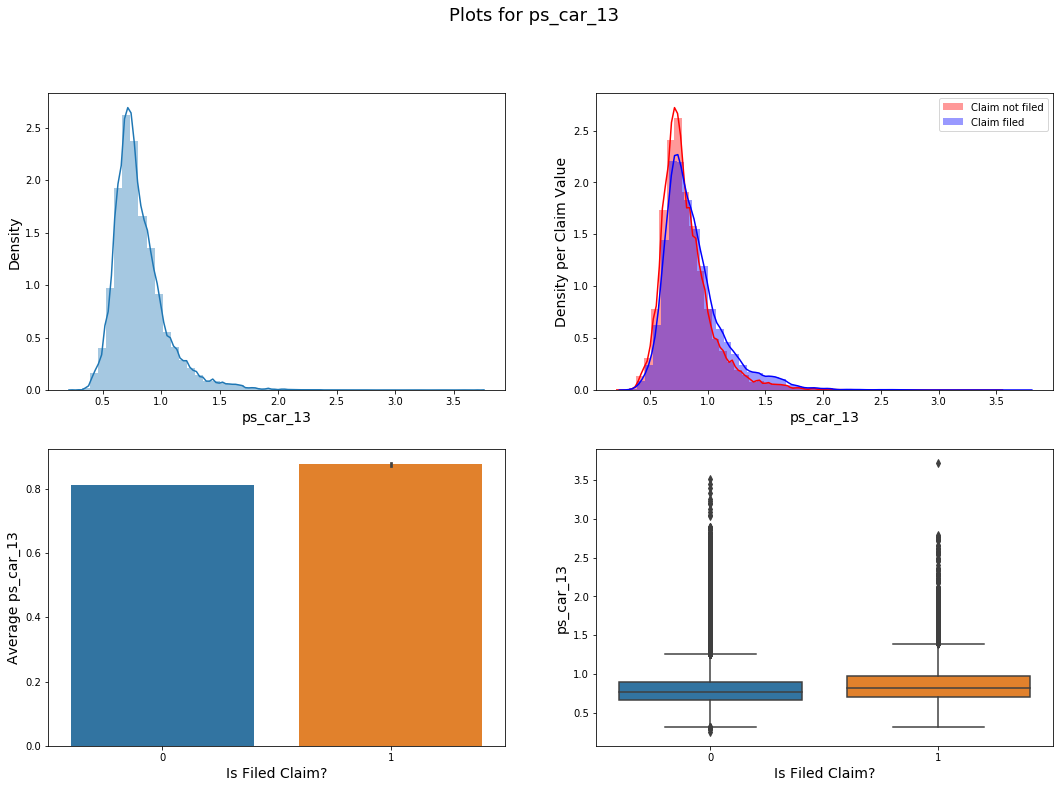

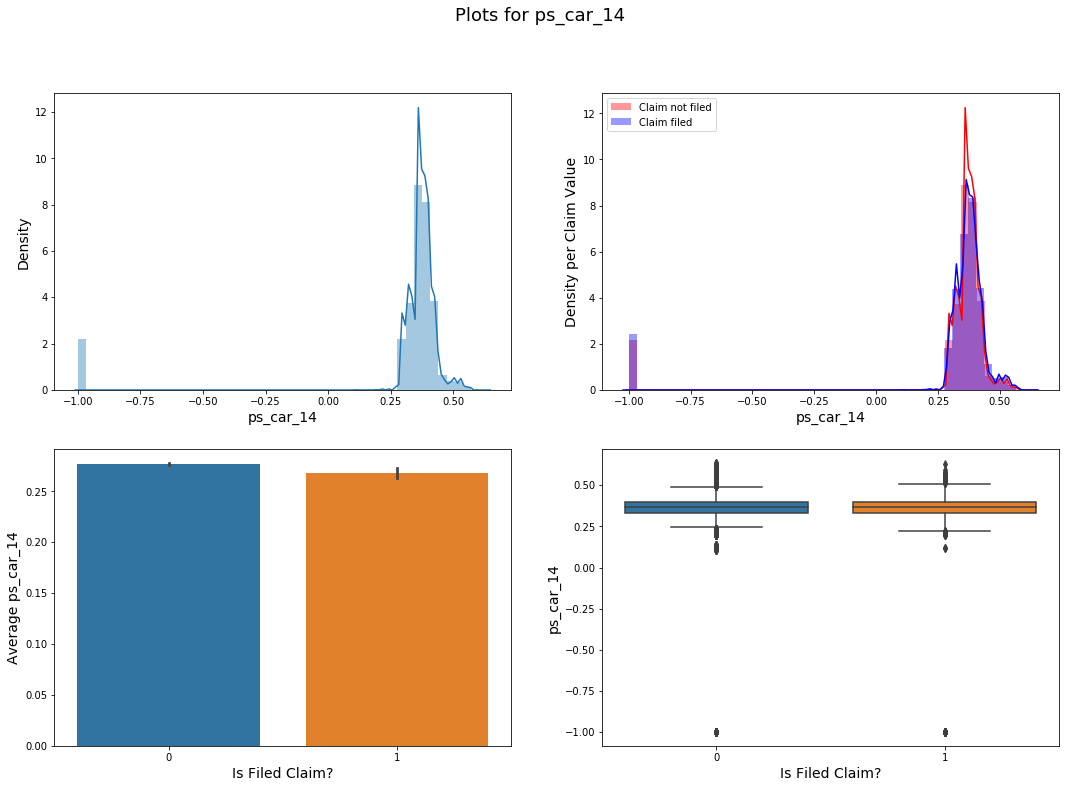

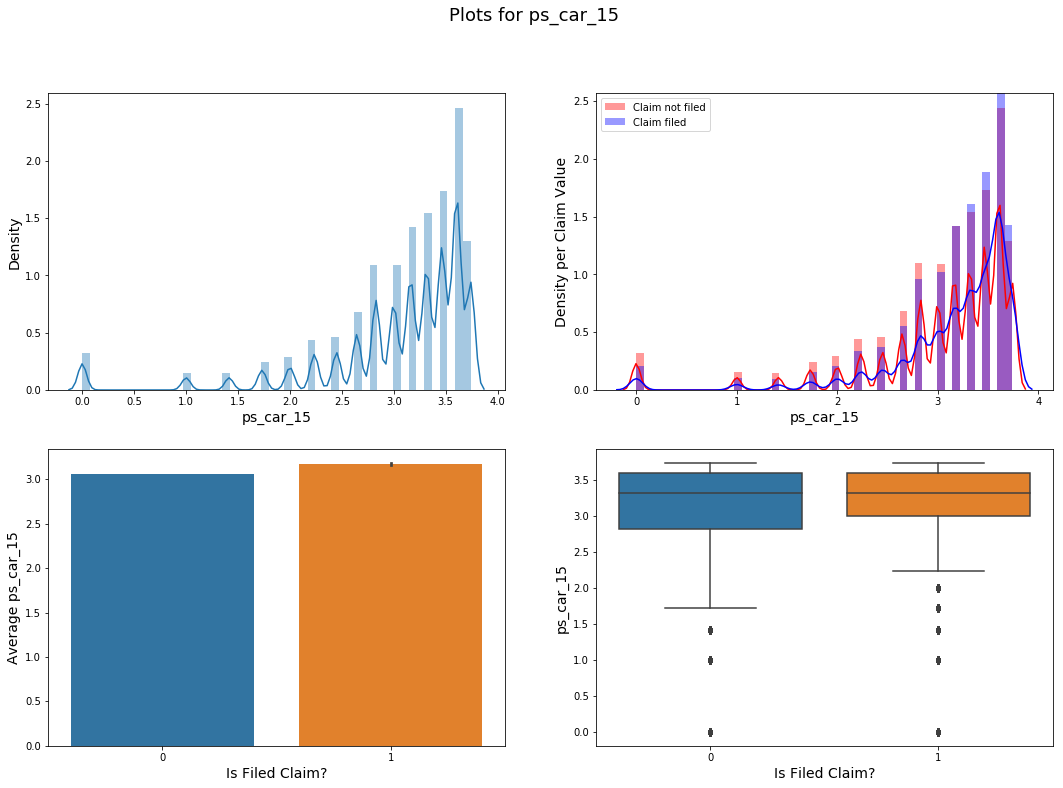

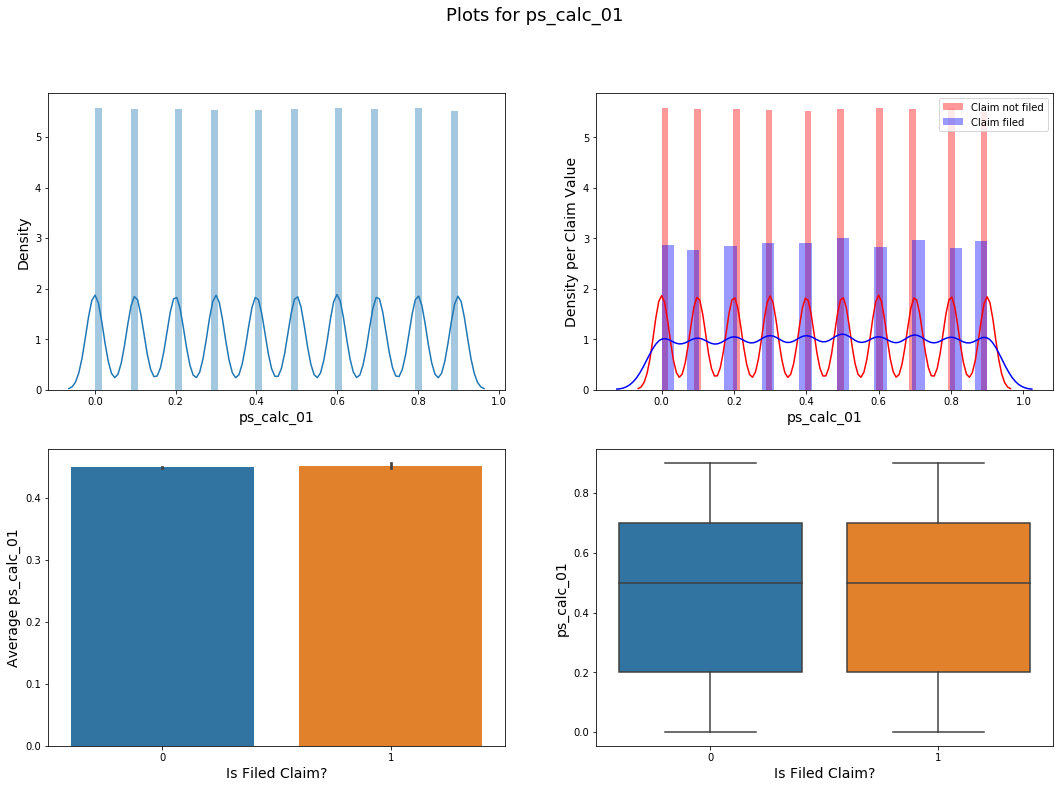

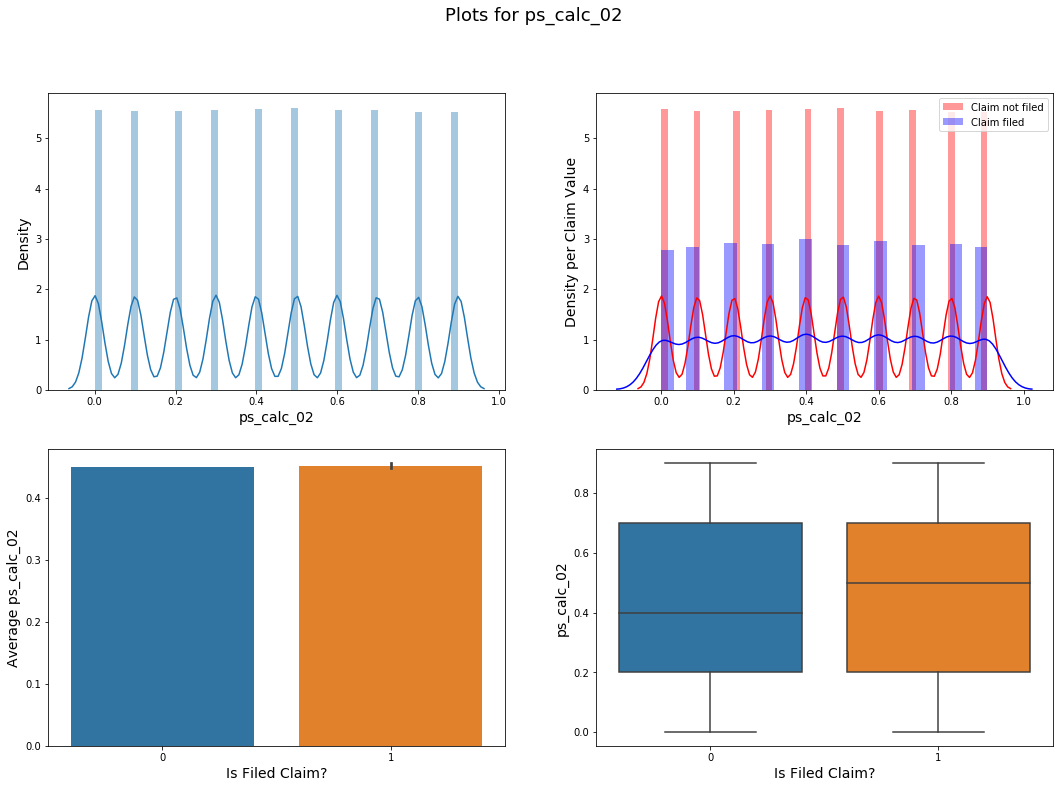

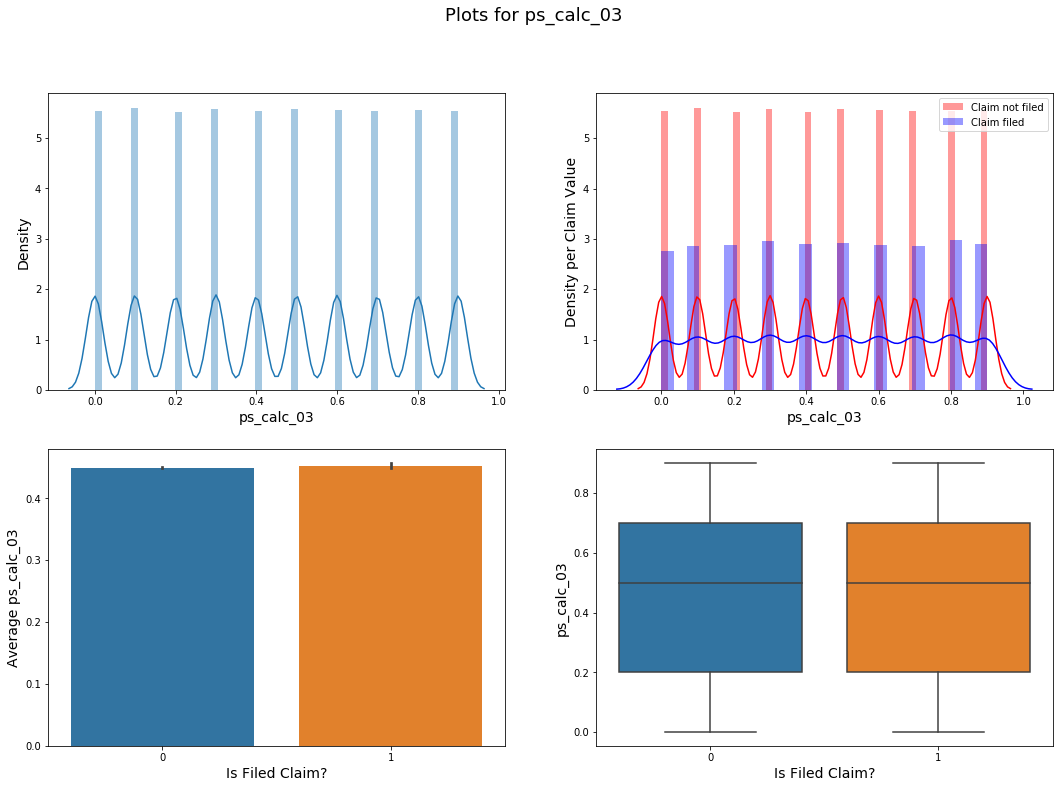

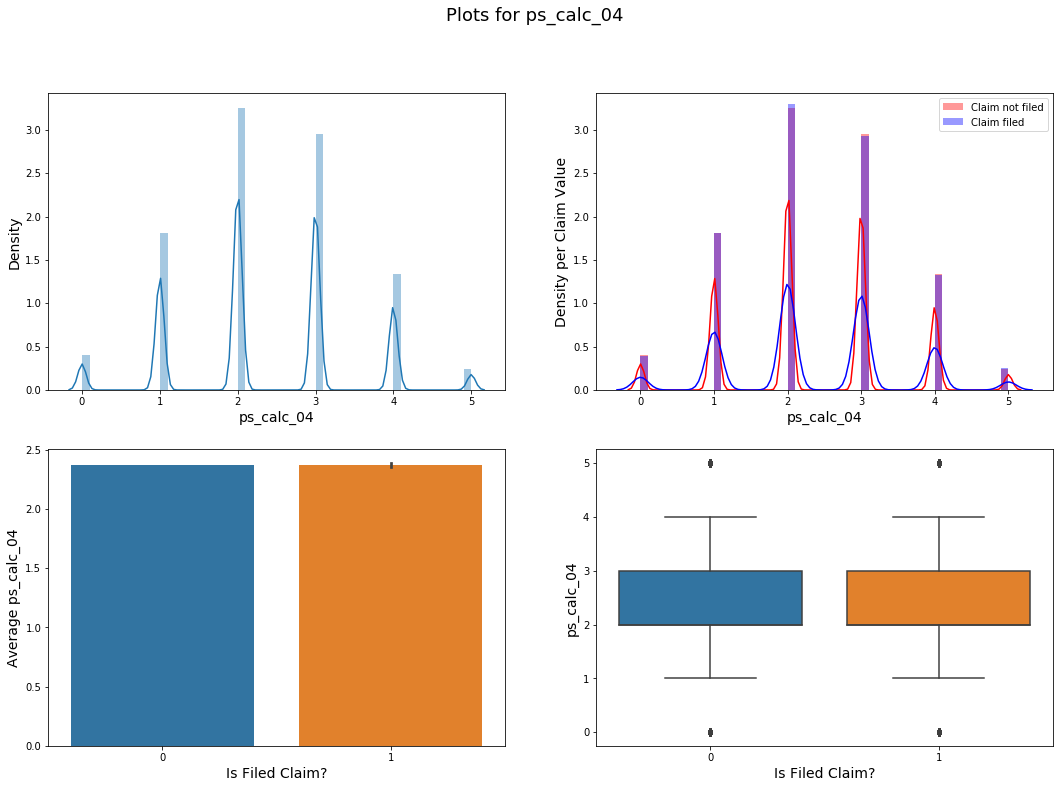

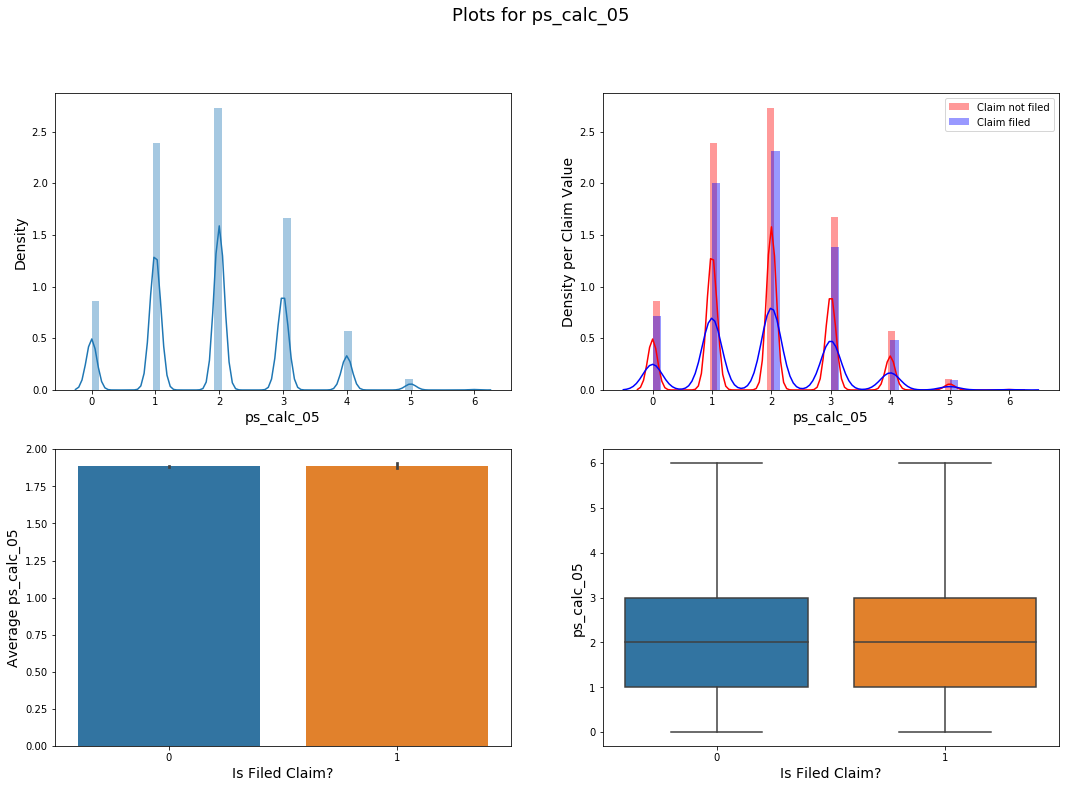

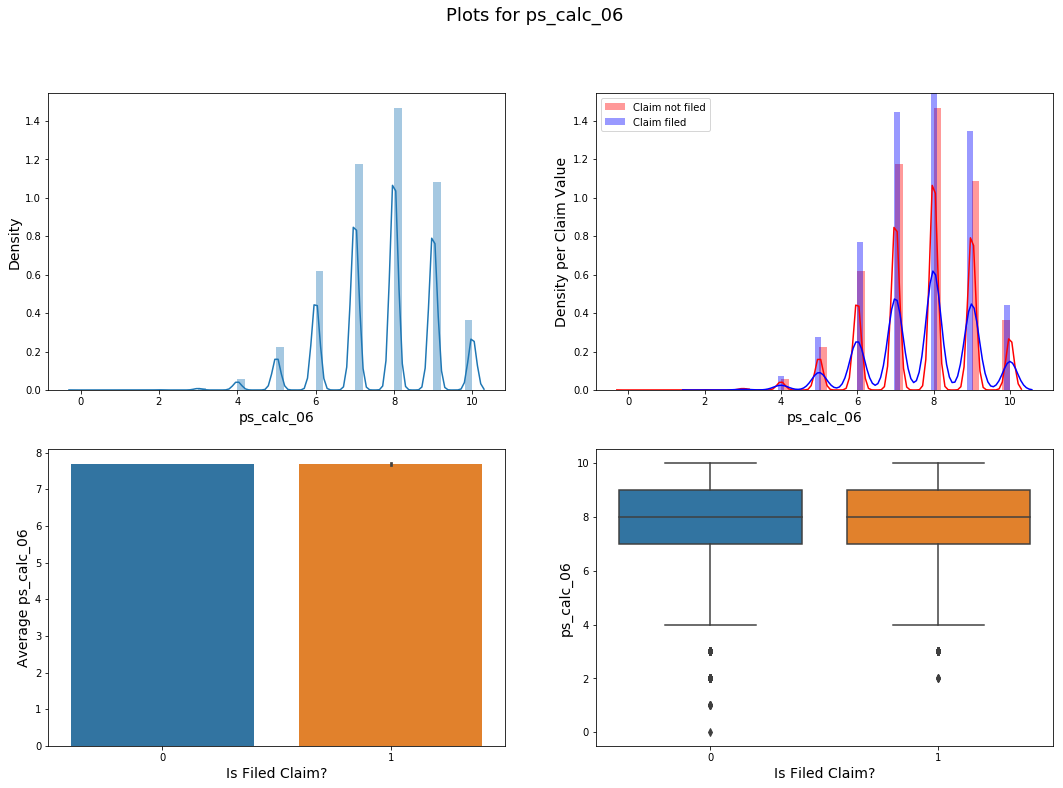

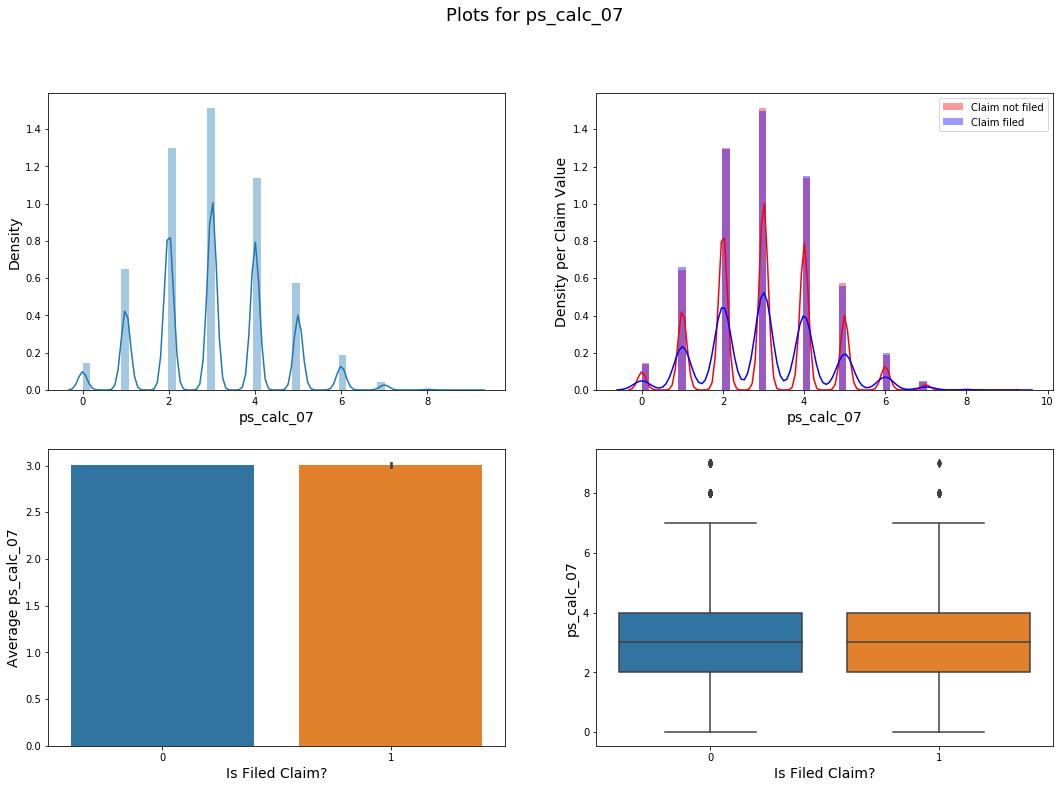

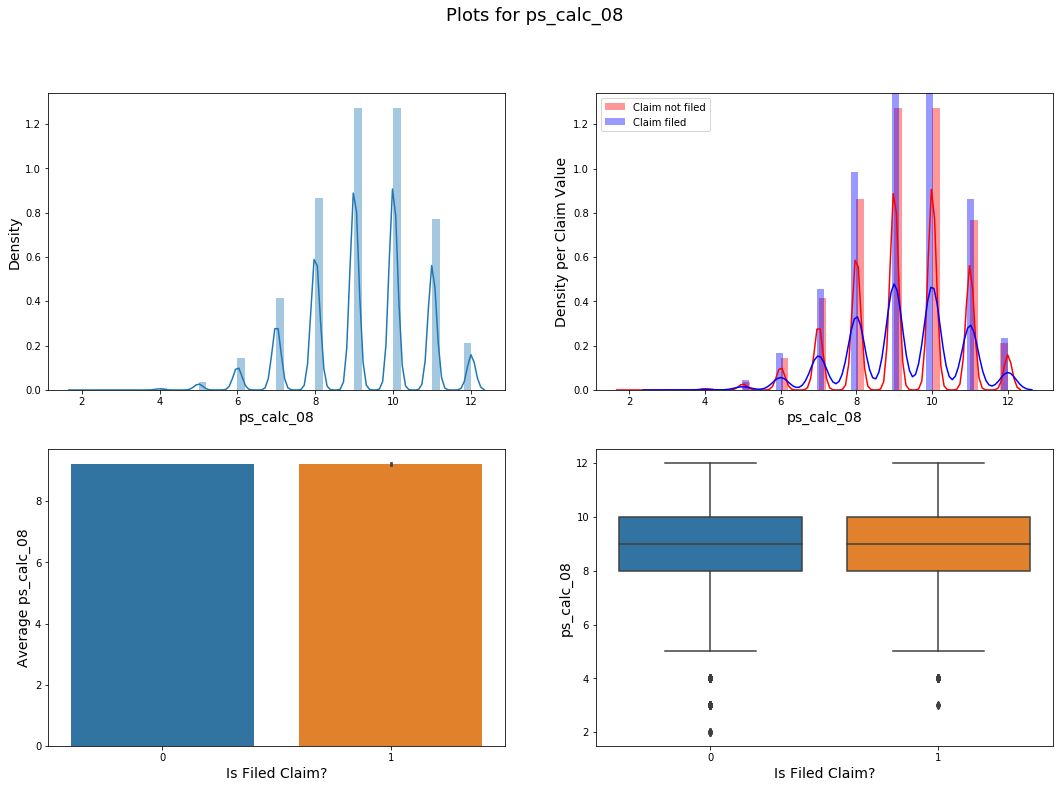

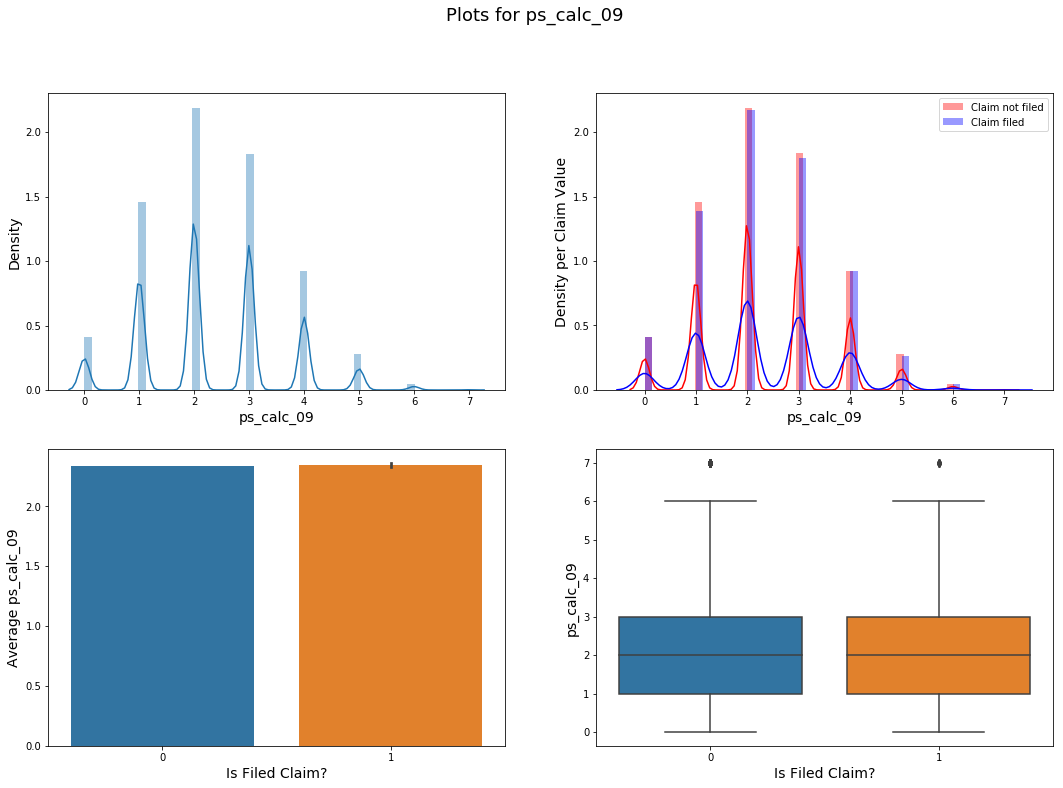

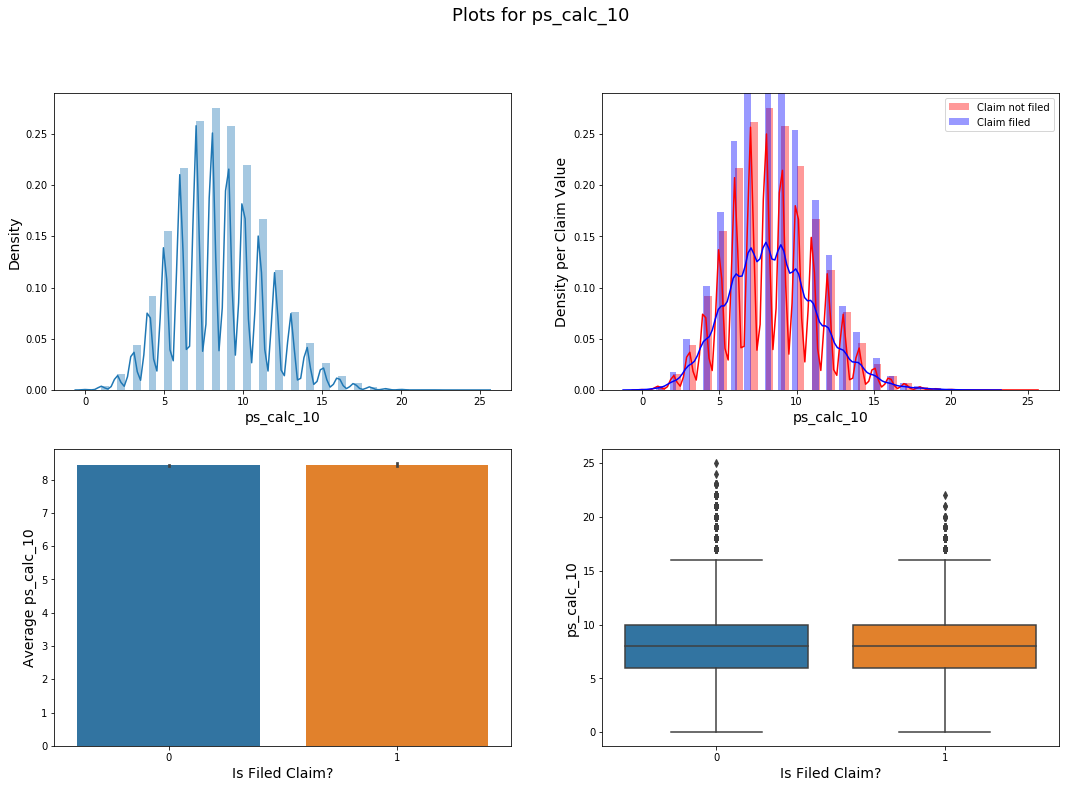

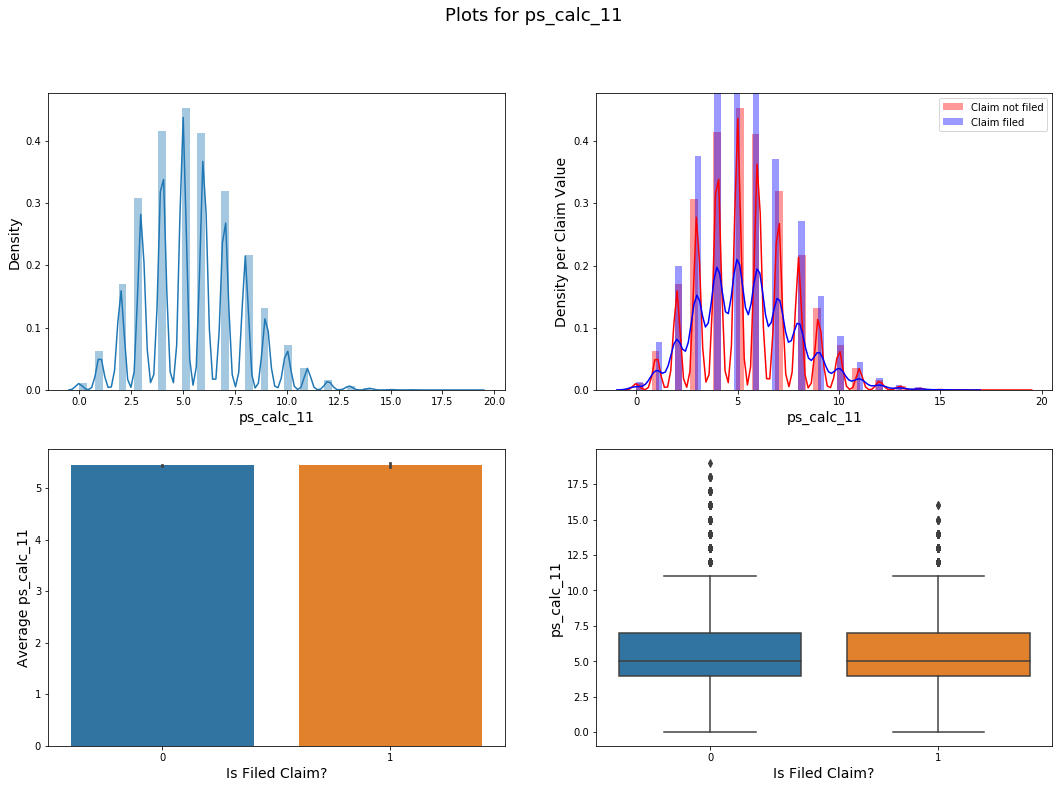

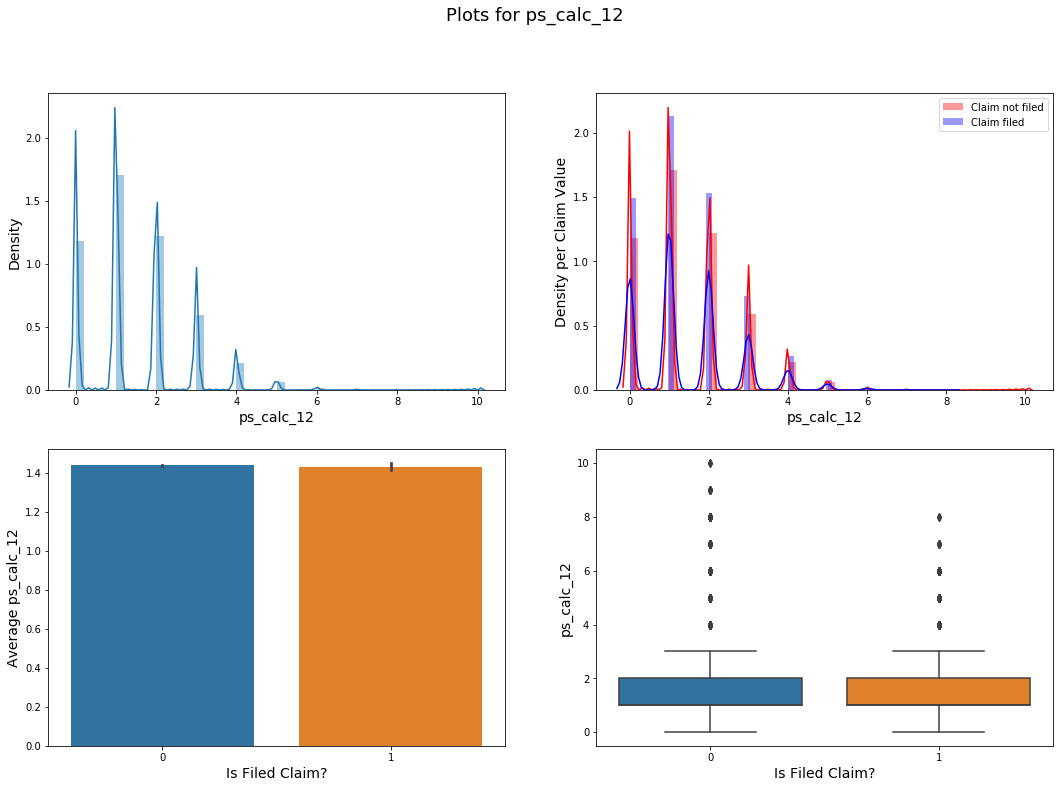

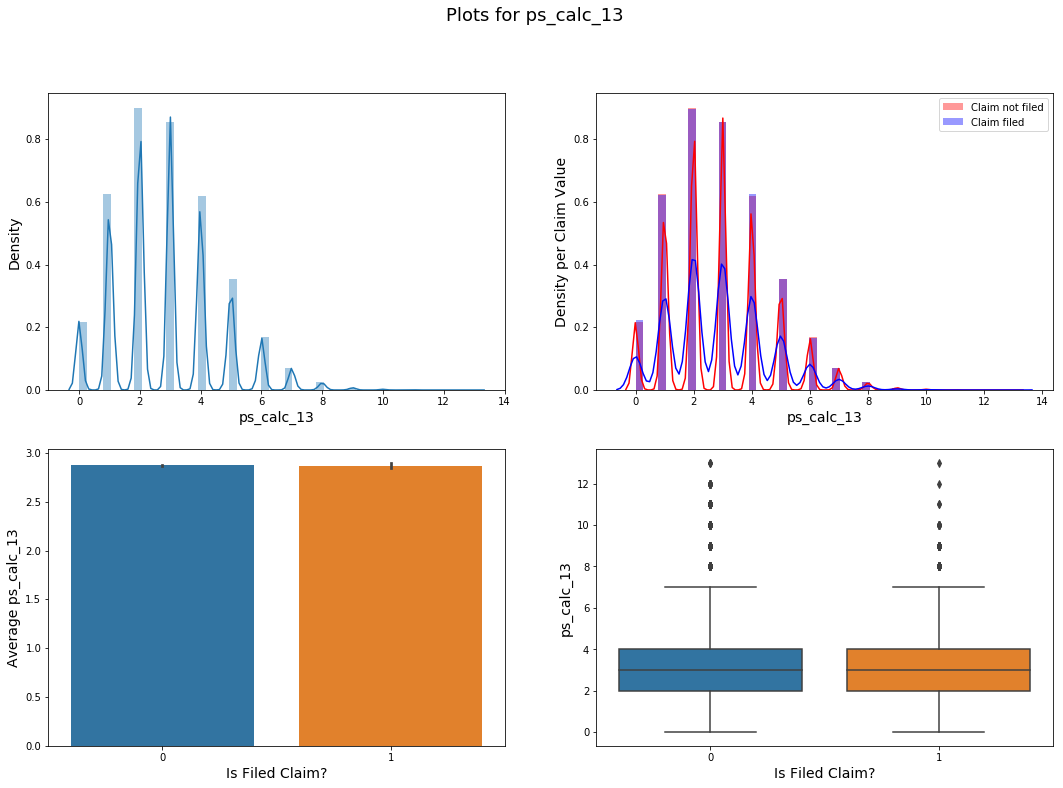

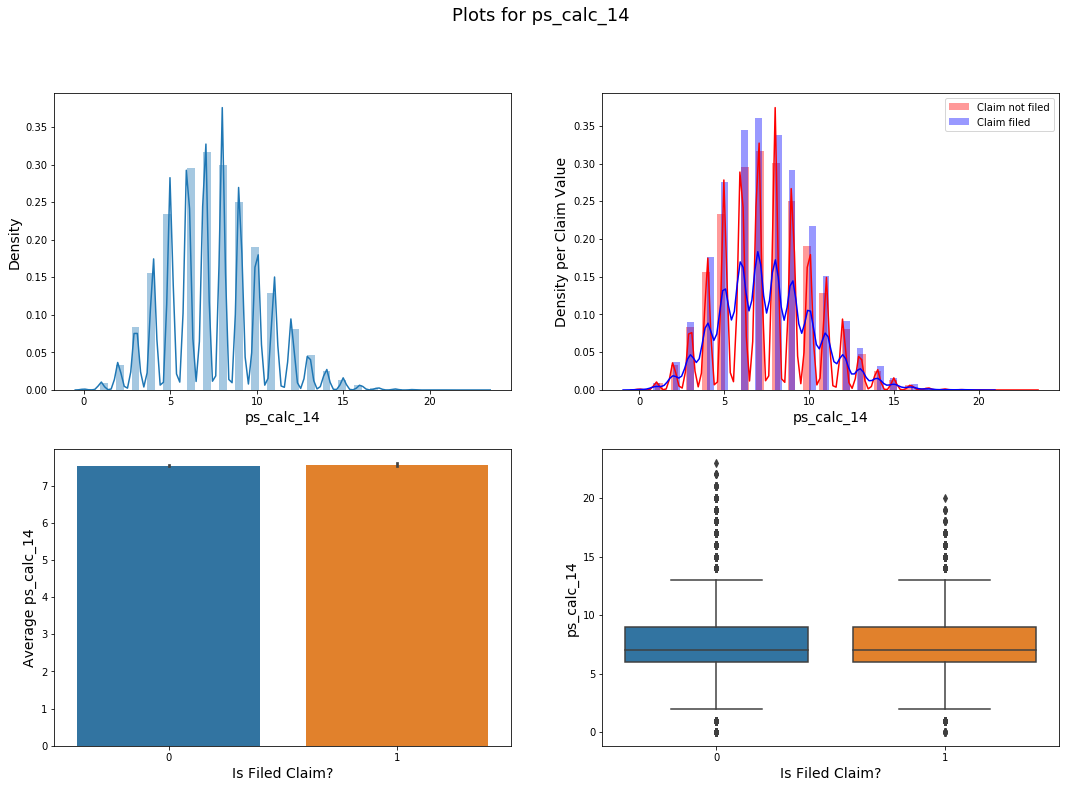

In [18]:
## Plotting numerical features
for column in nf:
    fig = plt.figure(figsize=(18,12))
    ### Distribution plot
    sb.distplot(train[column], ax=plt.subplot(221));
    plt.xlabel(column, fontsize=14);
    plt.ylabel('Density', fontsize=14);
    plt.suptitle('Plots for '+column, fontsize=18);
    
    # Claim Not Filed hist
    sb.distplot(train.loc[train.target==0, column], color='red', label='Claim not filed', ax=plt.subplot(222));
    # Claim Filed hist
    sb.distplot(train.loc[train.target==1, column], color='blue', label='Claim filed', ax=plt.subplot(222));
    plt.legend(loc='best')
    plt.xlabel(column, fontsize=14);
    plt.ylabel('Density per Claim Value', fontsize=14);
    
    ### Average Column value per Claim Value
    sb.barplot(x="target", y=column, data=train, ax=plt.subplot(223));
    plt.xlabel('Is Filed Claim?', fontsize=14);
    plt.ylabel('Average ' + column, fontsize=14);
    
    ### Boxplot of Column per Claim Value
    sb.boxplot(x="target", y=column, data=train, ax=plt.subplot(224));
    plt.xlabel('Is Filed Claim?', fontsize=14);
    plt.ylabel(column, fontsize=14);
    plt.show()

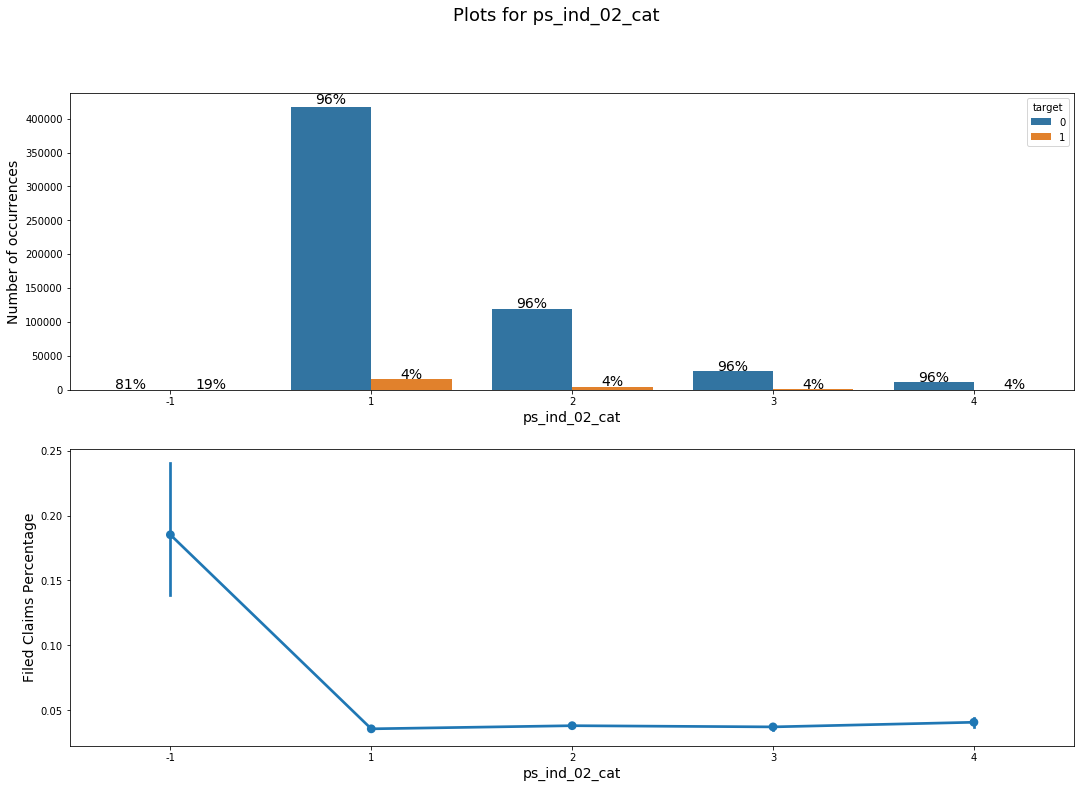

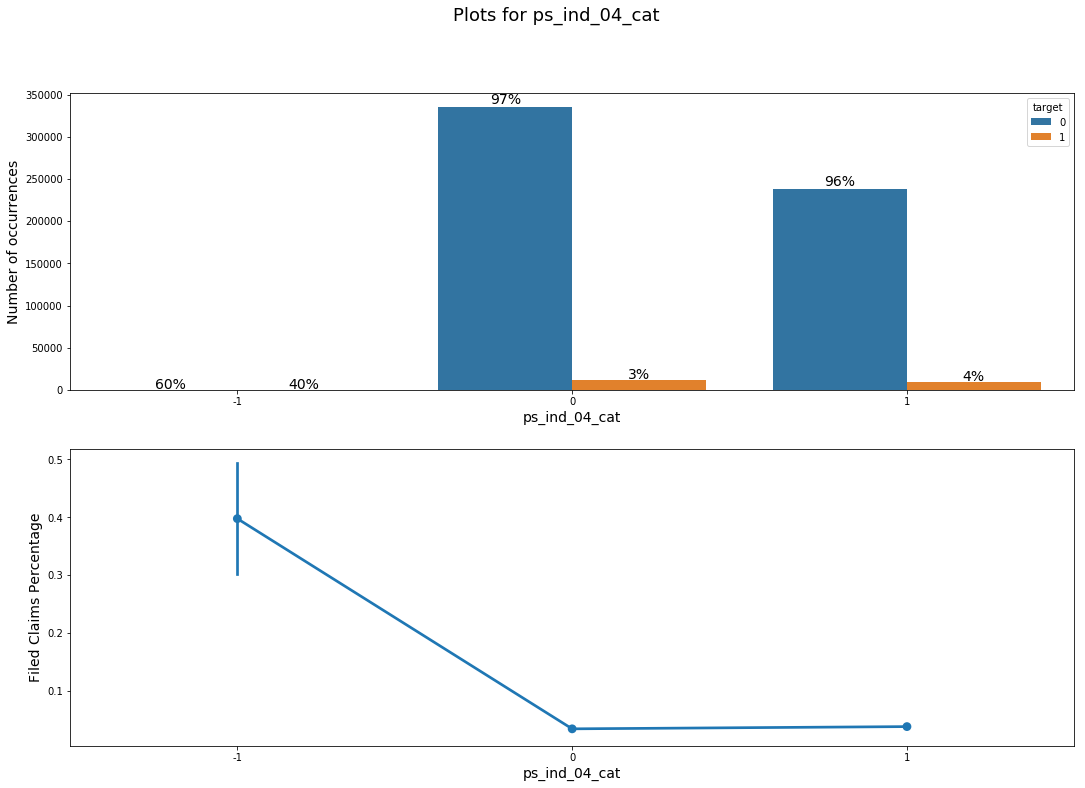

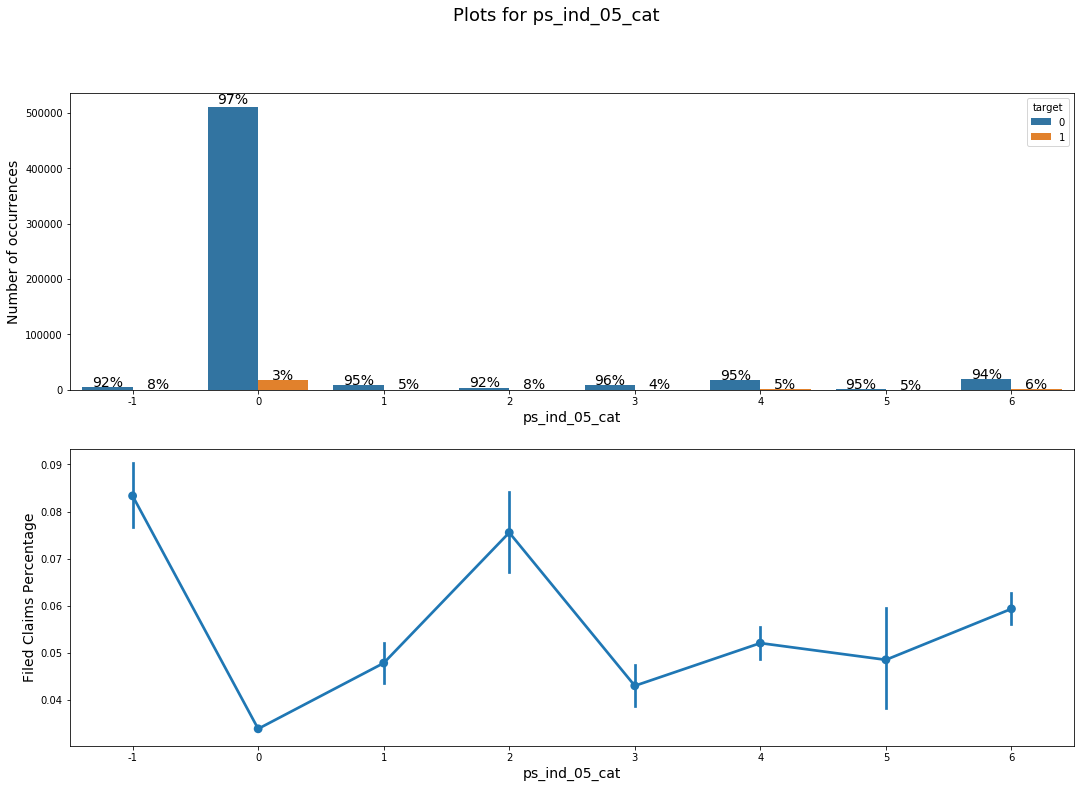

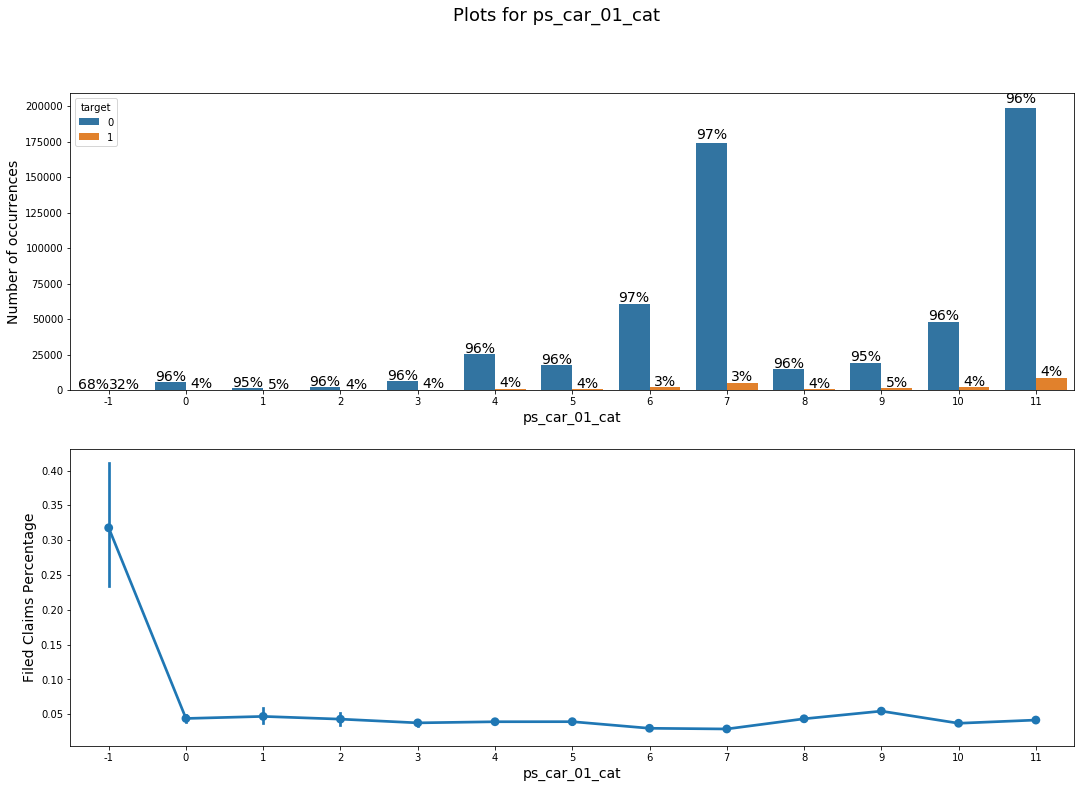

ValueError: cannot convert float NaN to integer

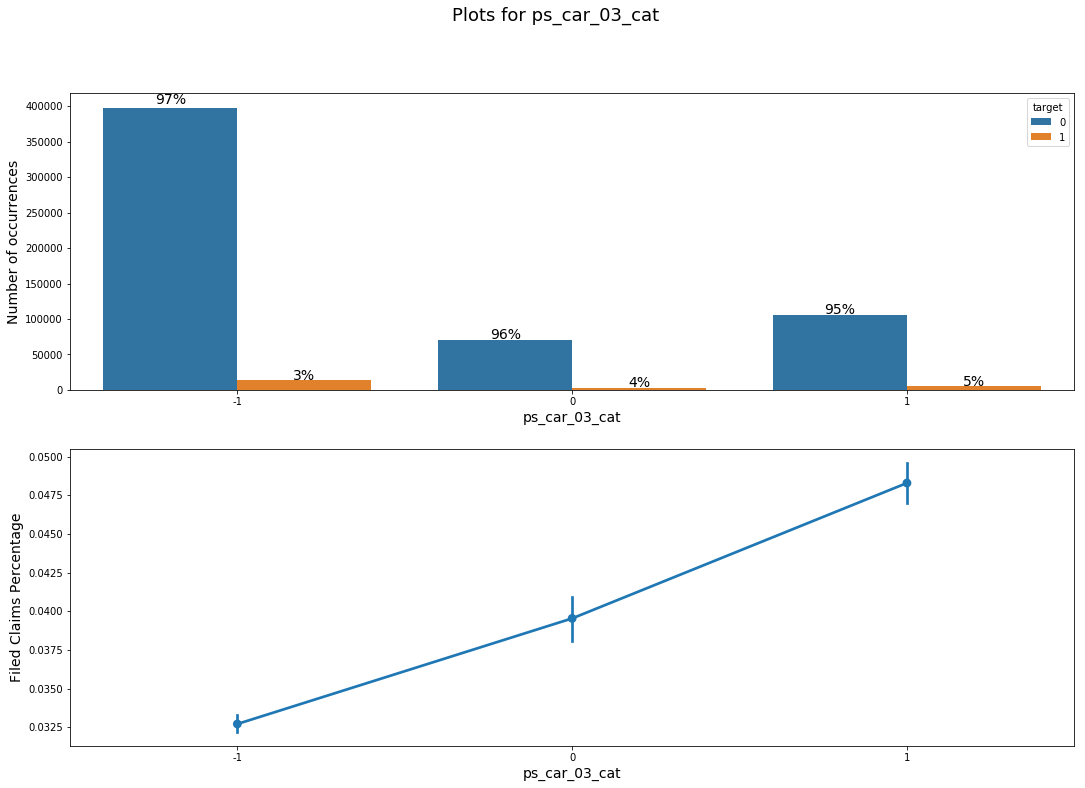

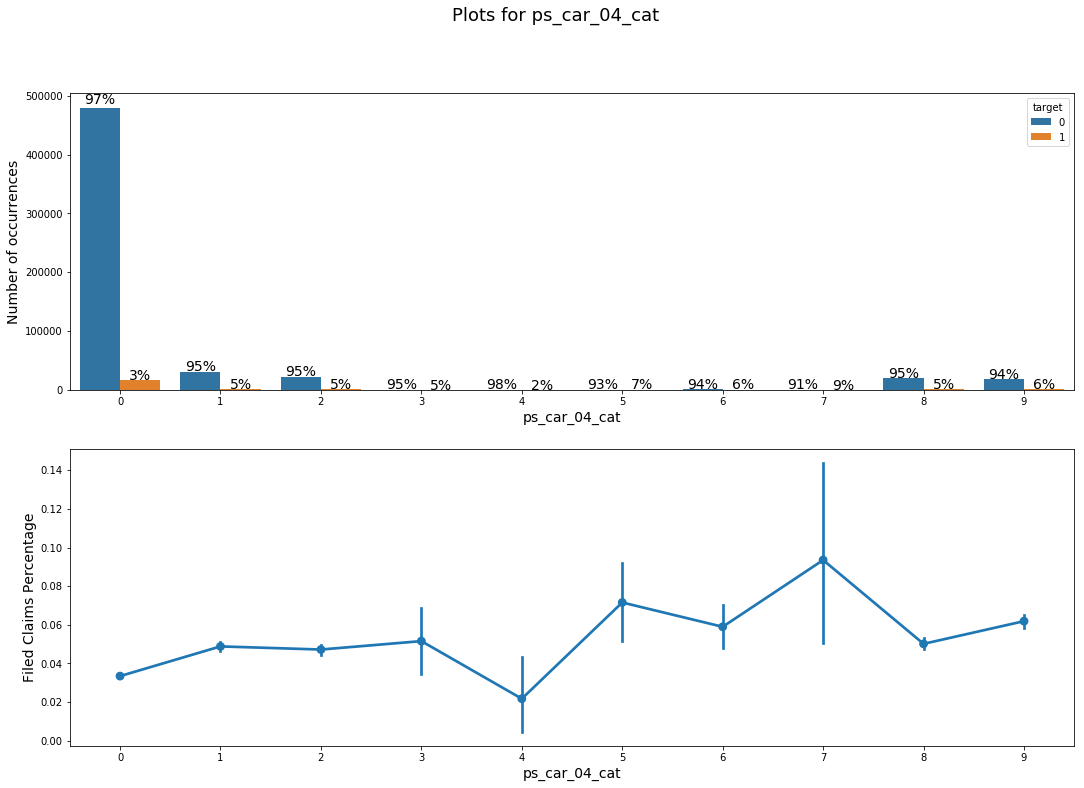

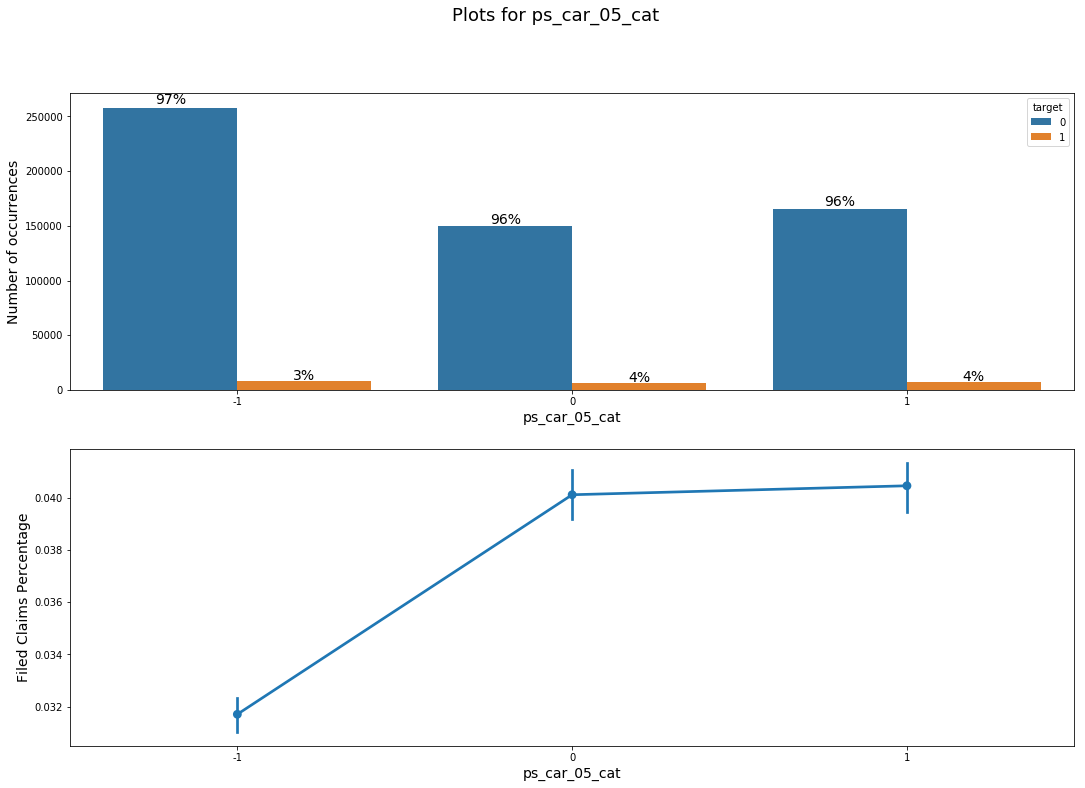

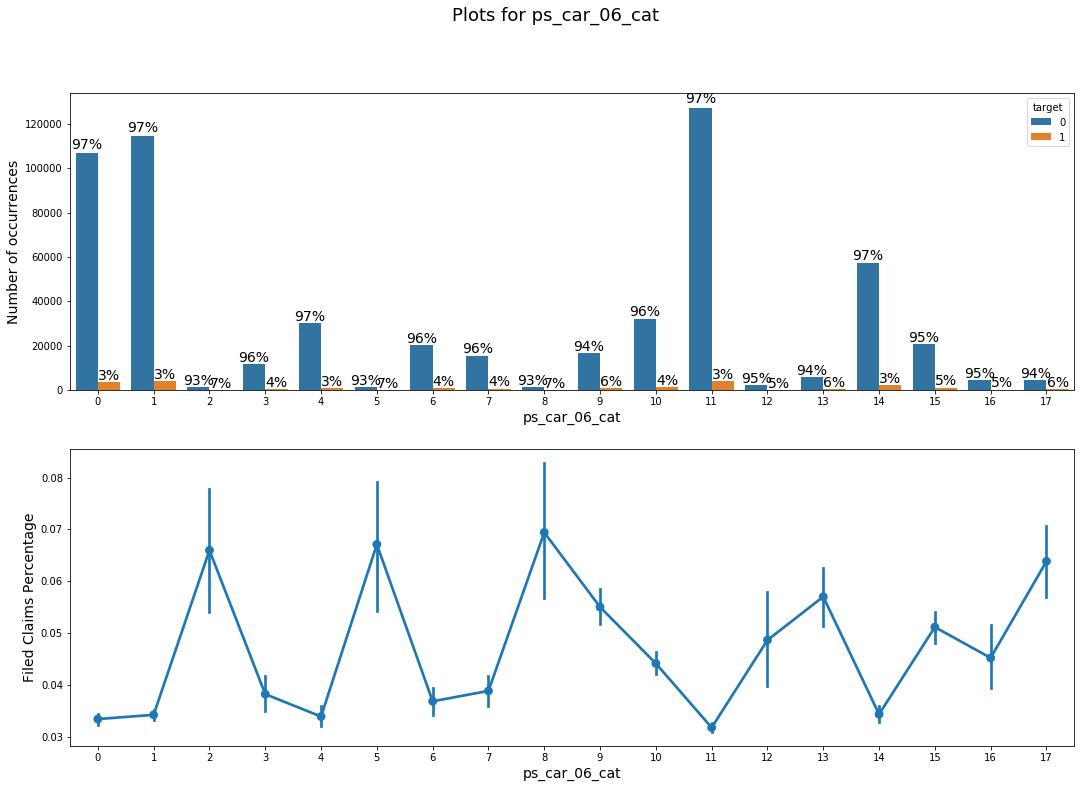

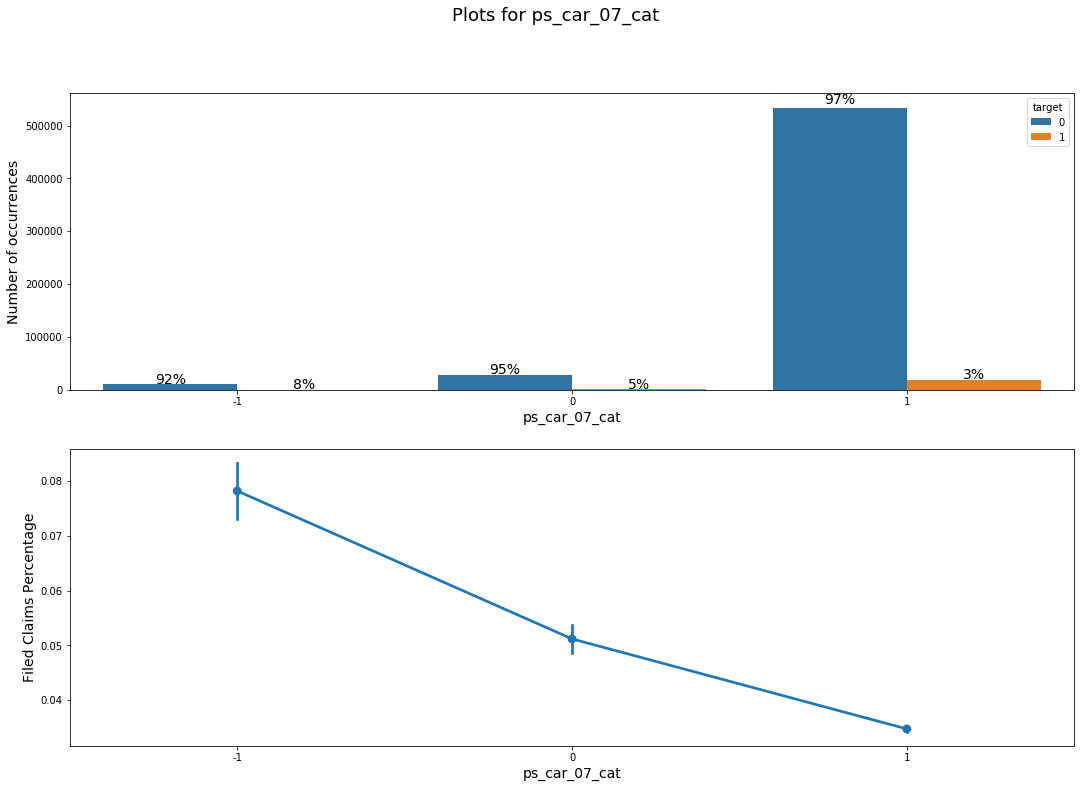

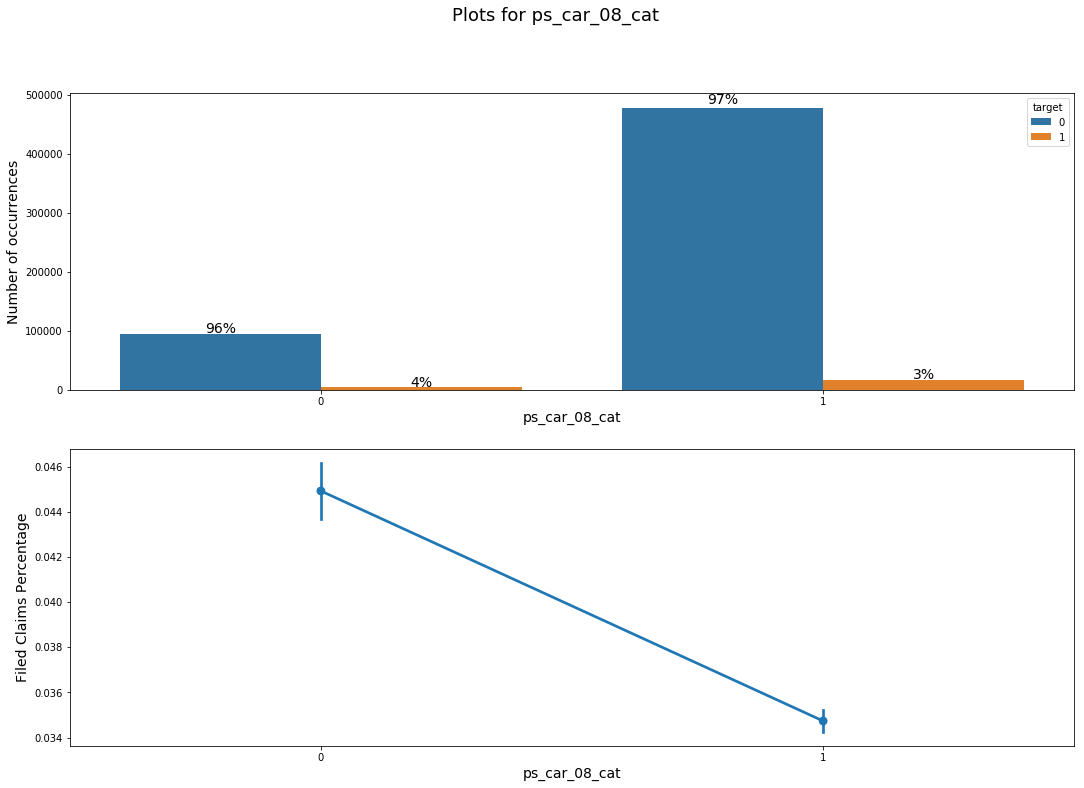

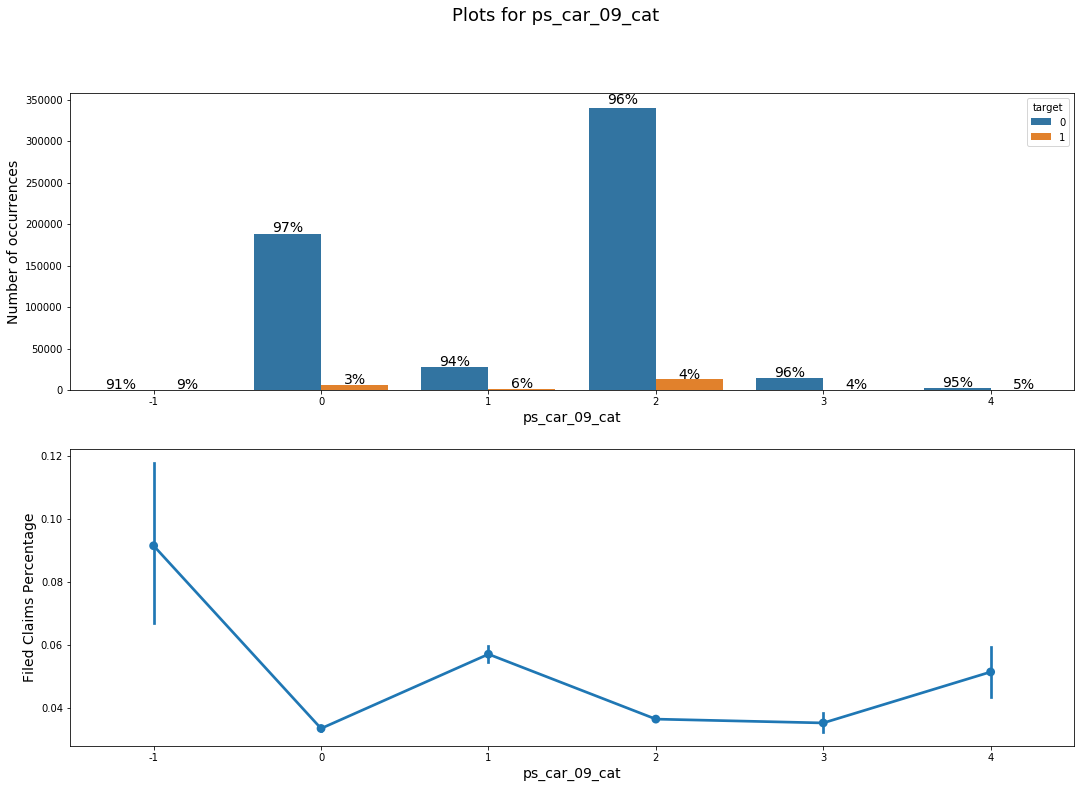

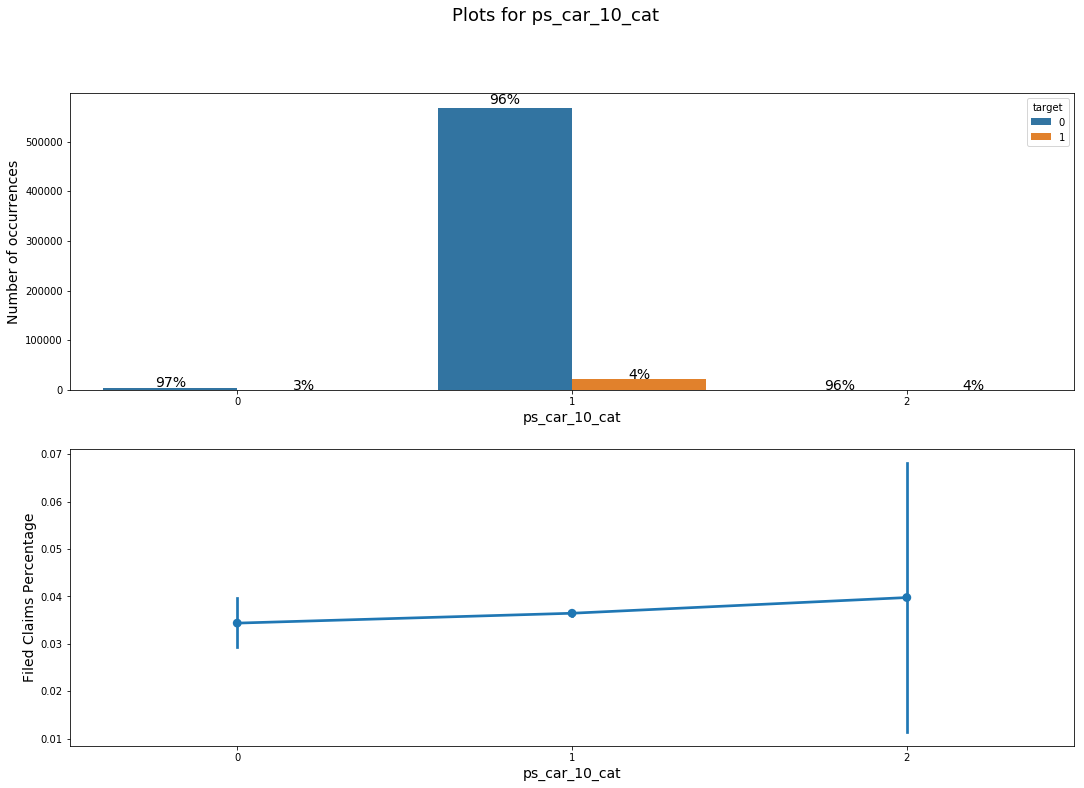

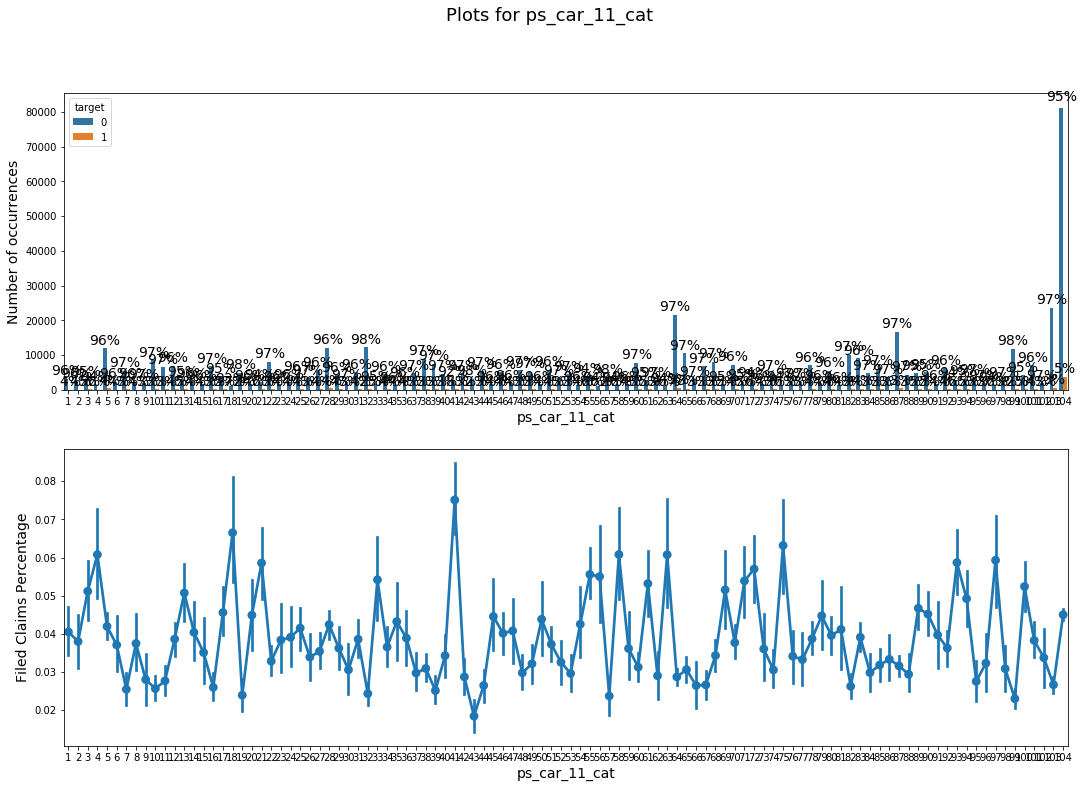

In [19]:
### Plotting Categorical Features
for column in cf:
    fig = plt.figure(figsize=(18,12))
    ### Number of occurrences per categoty - target pair
    ax = sb.countplot(x=column, hue="target", data=train, ax = plt.subplot(211));
    plt.xlabel(column, fontsize=14);
    plt.ylabel('Number of occurrences', fontsize=14);
    plt.suptitle('Plots for '+column, fontsize=18);
    
    ### Adding percents over bars
    h = [p.get_height() for p in ax.patches] 
    ncol = int(len(h)/2)
    total = [h[i] + h[i + ncol] for i in range(ncol)] * 2
    # Looping through bars
    for i, p in enumerate(ax.patches):    
        ax.text(p.get_x()+p.get_width()/2, h[i]*1.01 + 1000,
                '{:1.0%}'.format(h[i]/total[i]), ha="center", size=14) 

    
    ### Filed Claims percentage for every value of feature
    sb.pointplot(x=column, y='target', data=train, ax = plt.subplot(212));
    plt.xlabel(column, fontsize=14);
    plt.ylabel('Filed Claims Percentage', fontsize=14);
    plt.show()

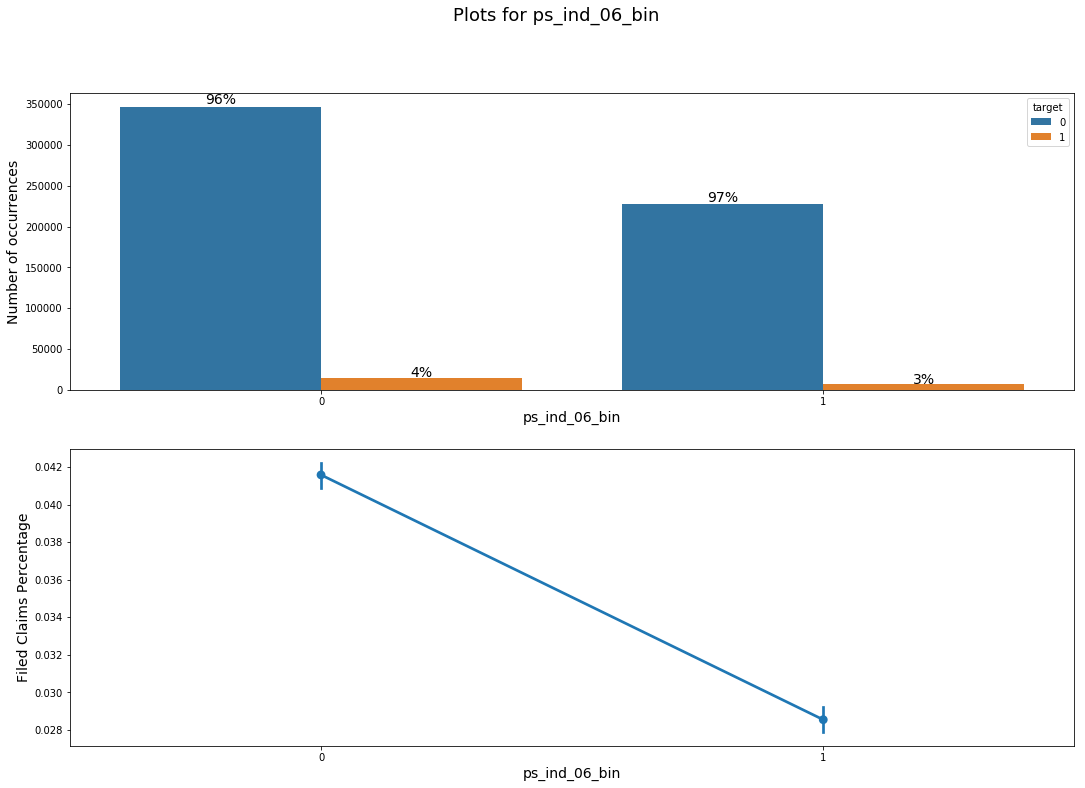

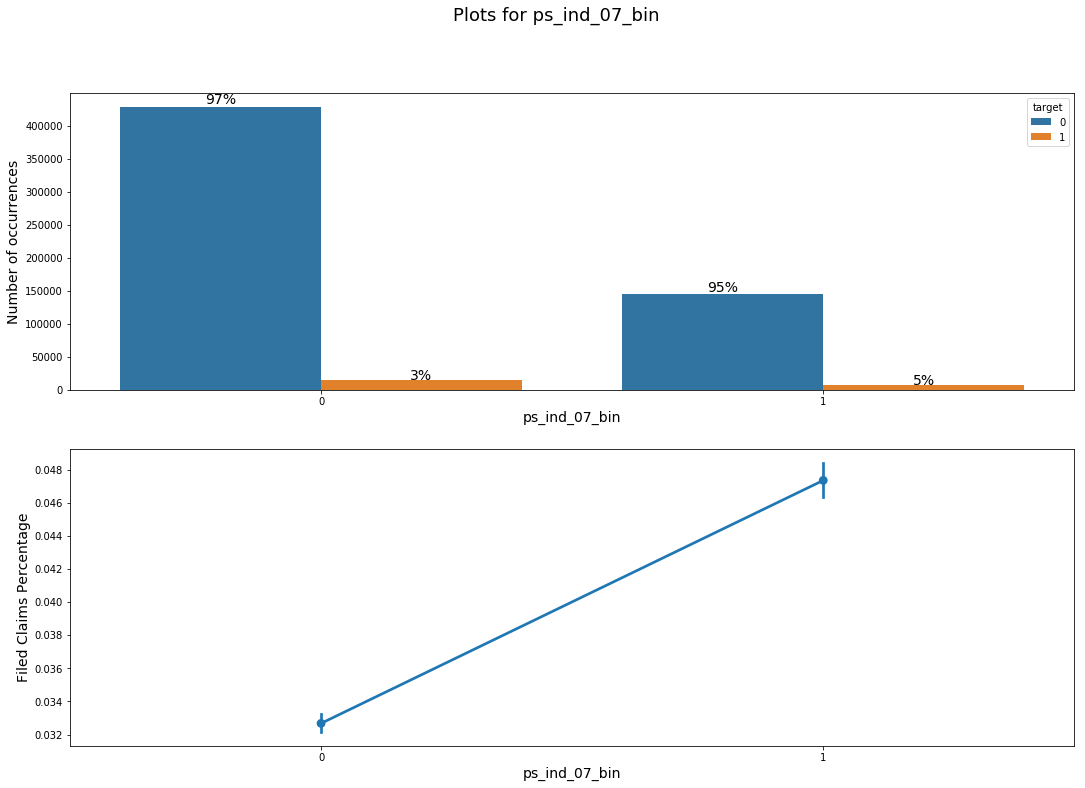

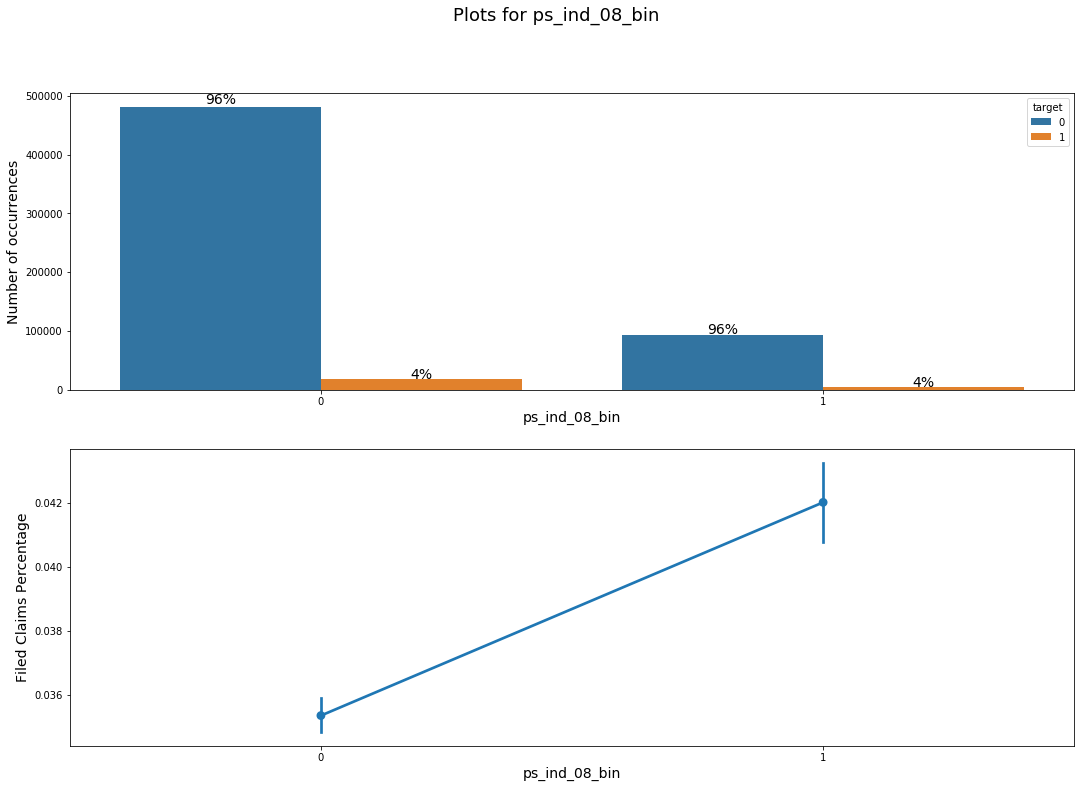

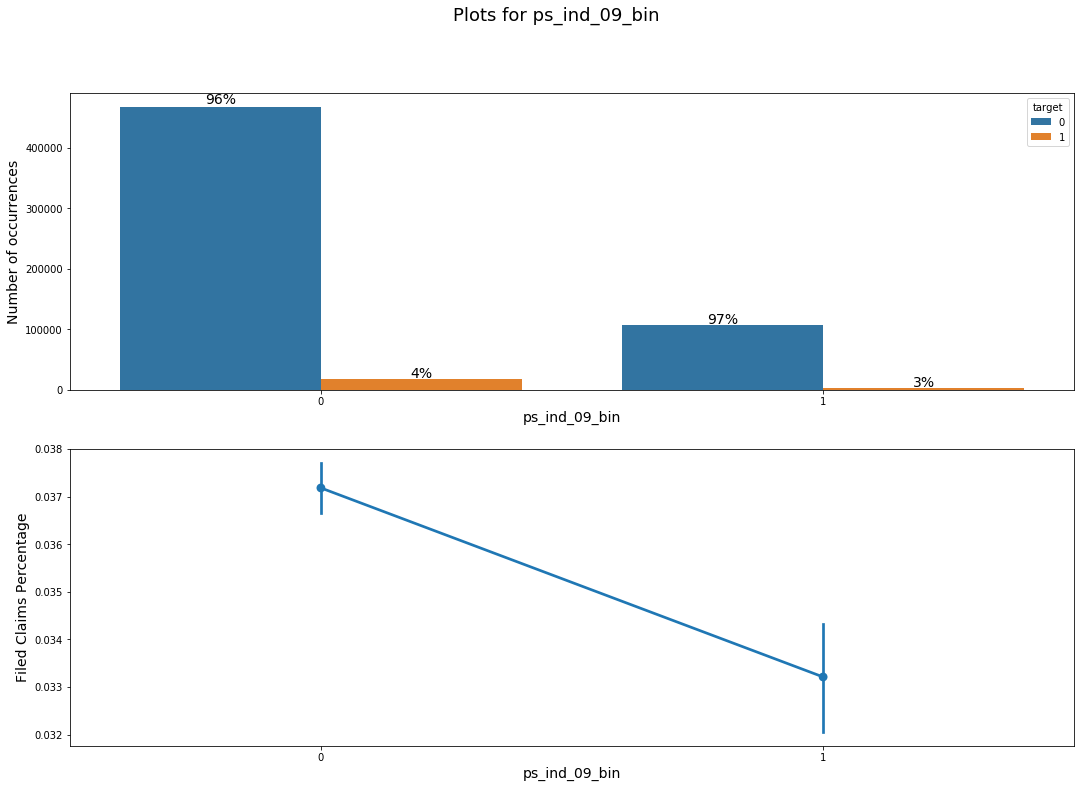

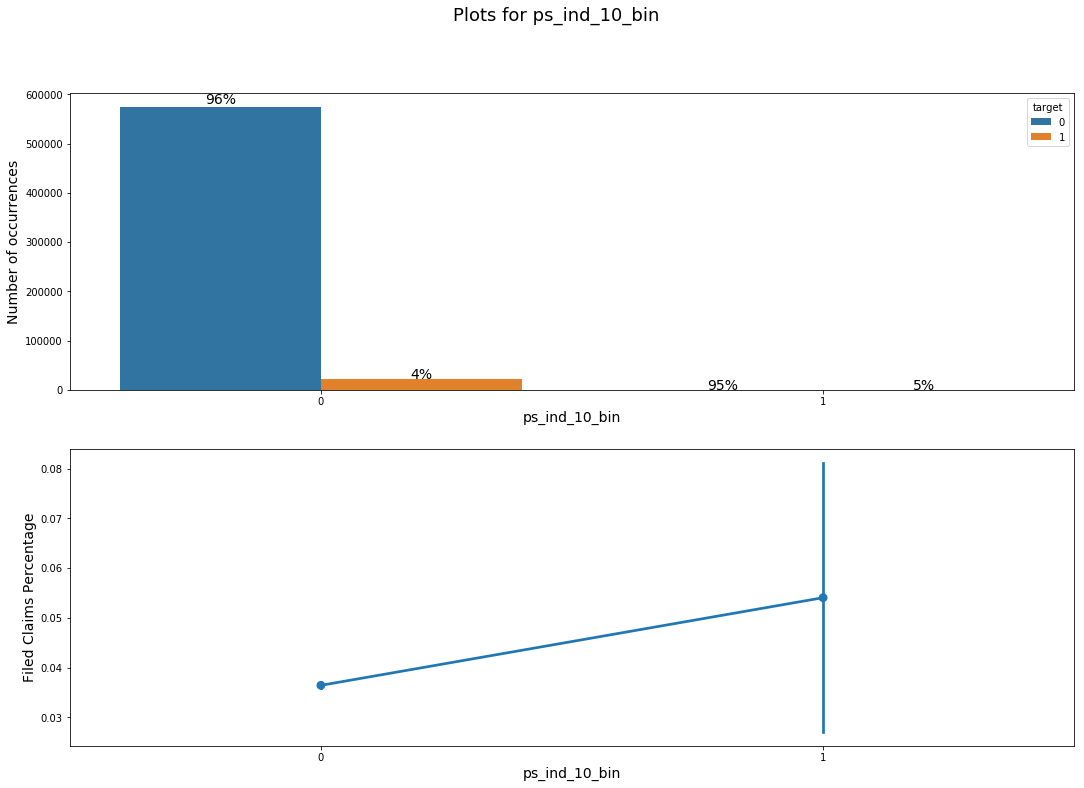

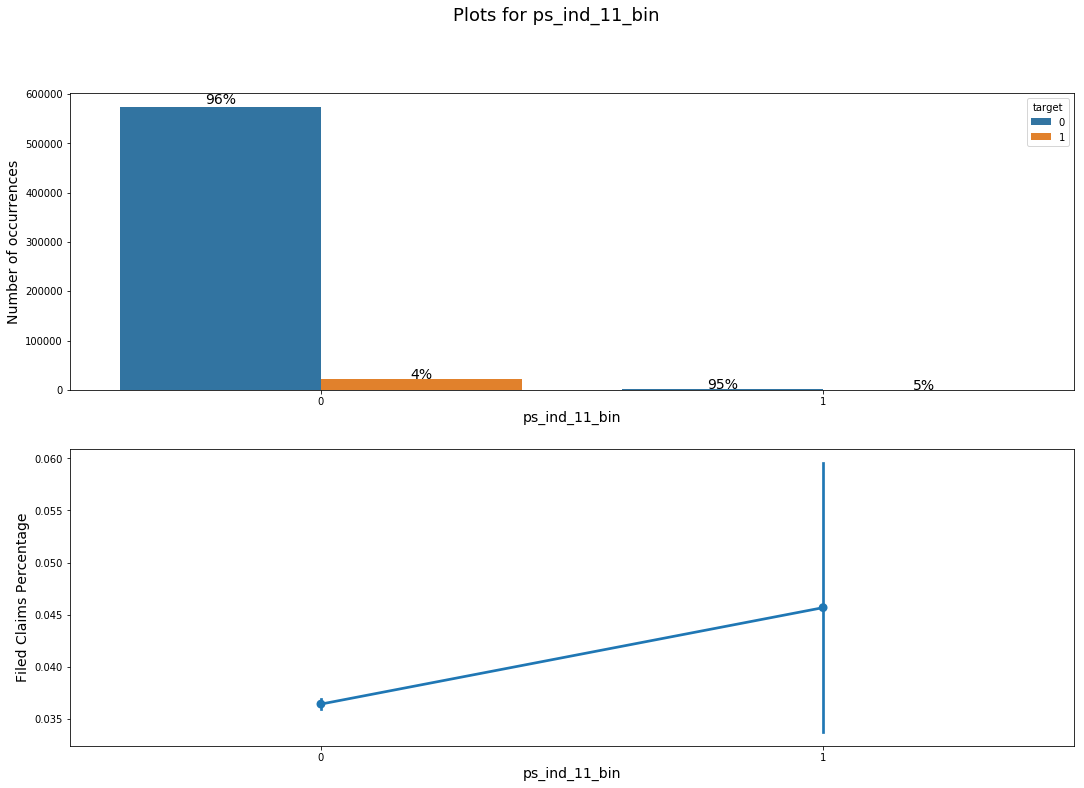

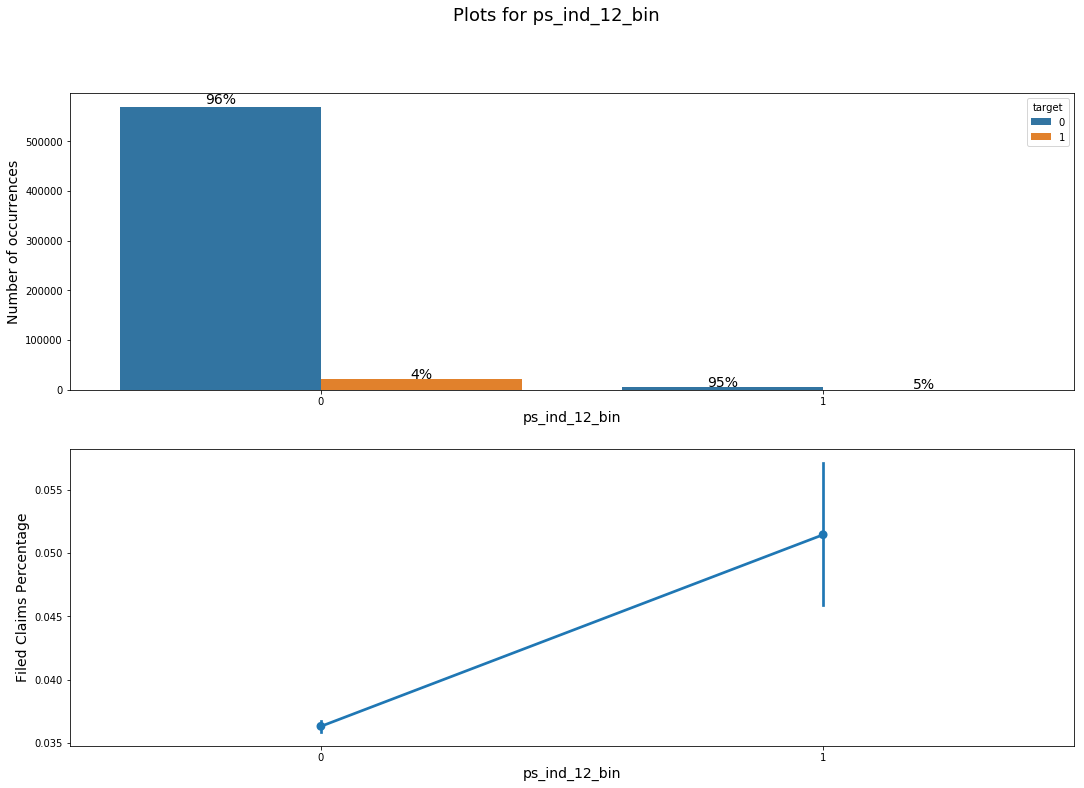

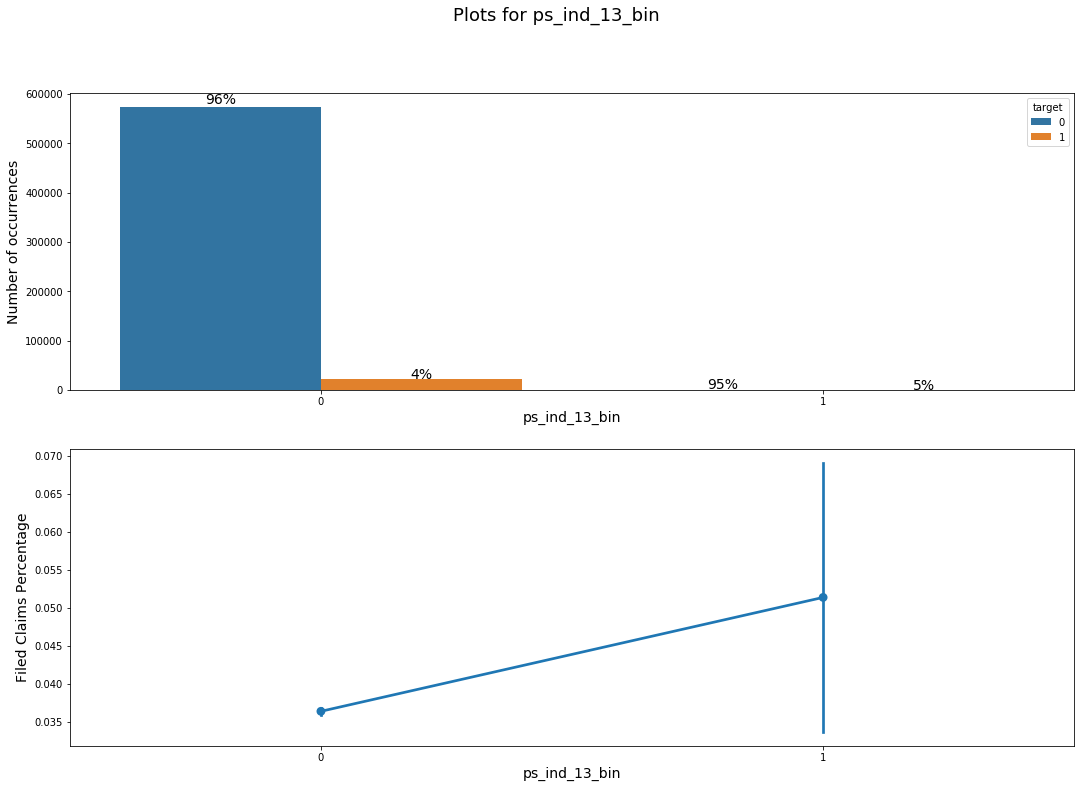

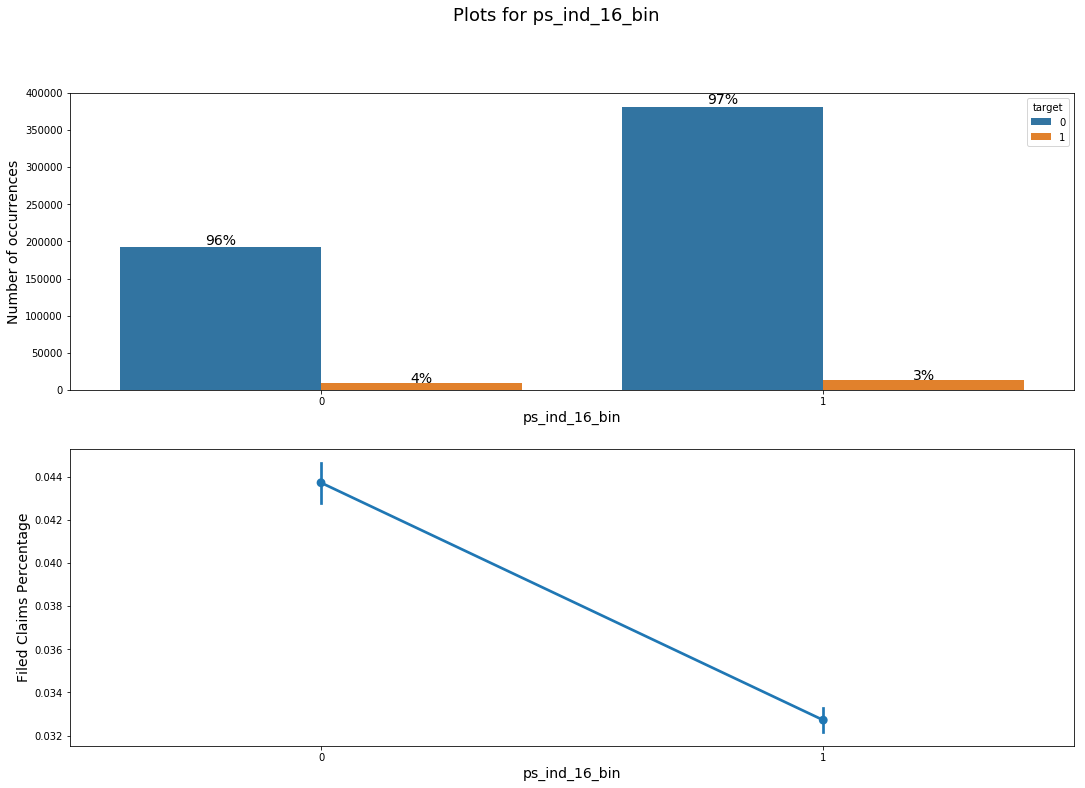

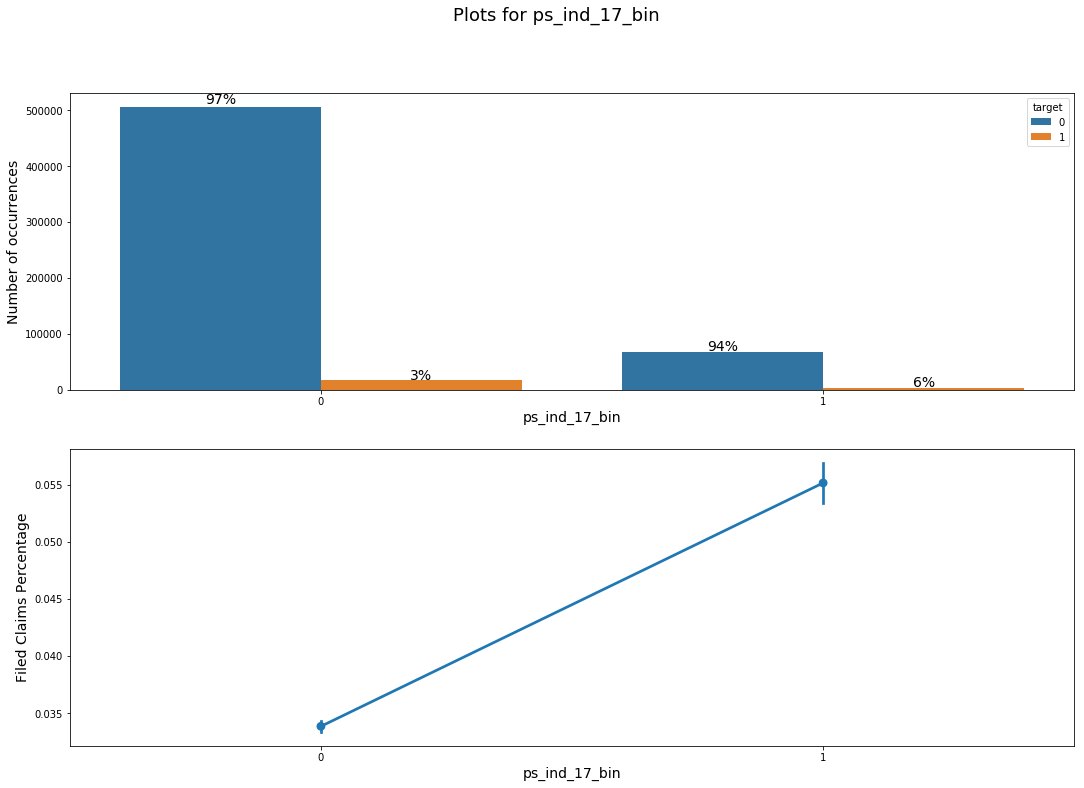

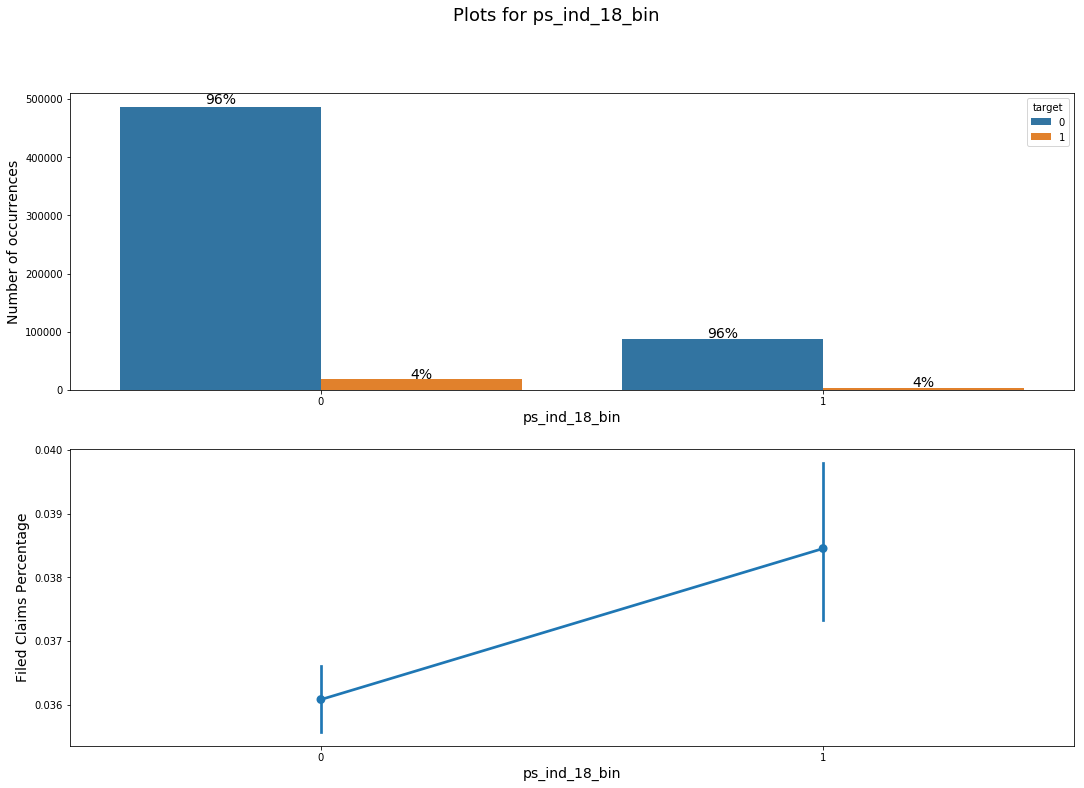

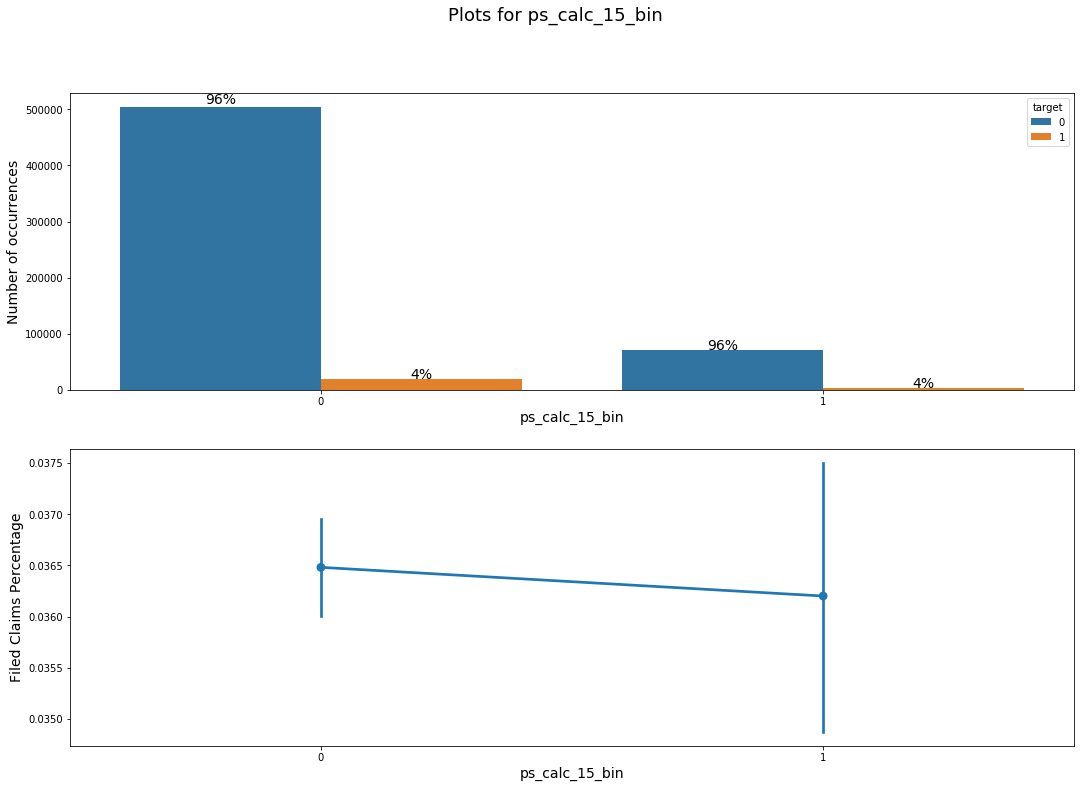

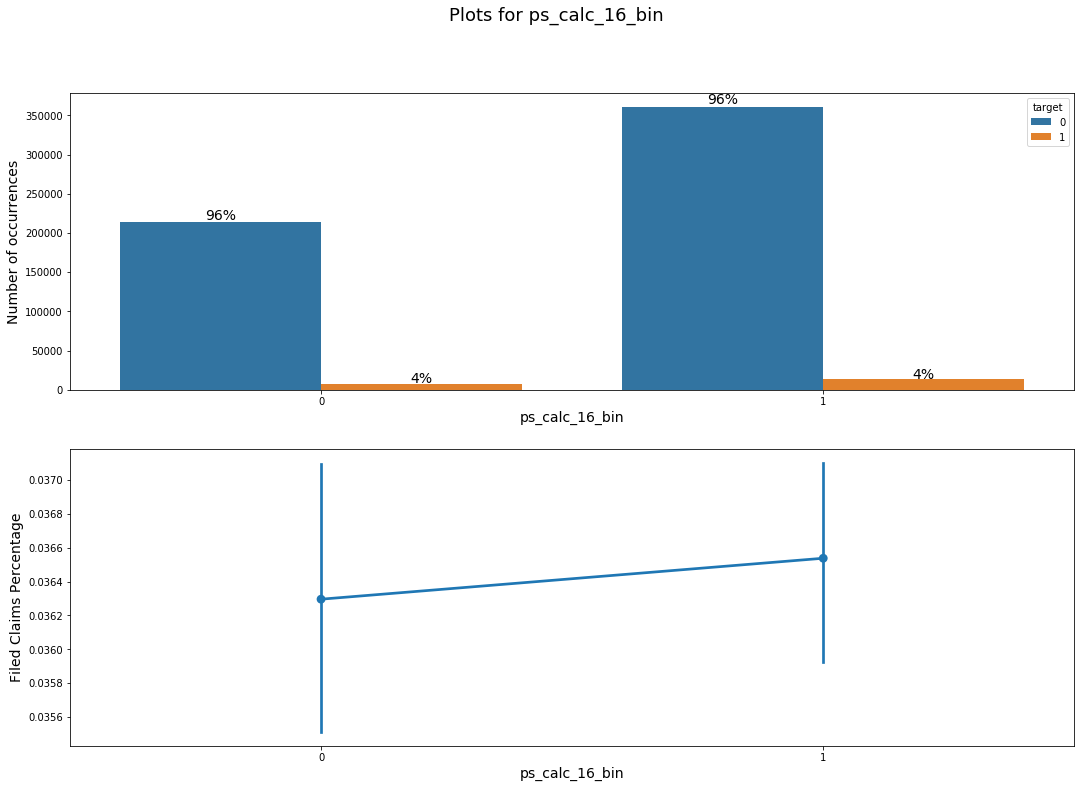

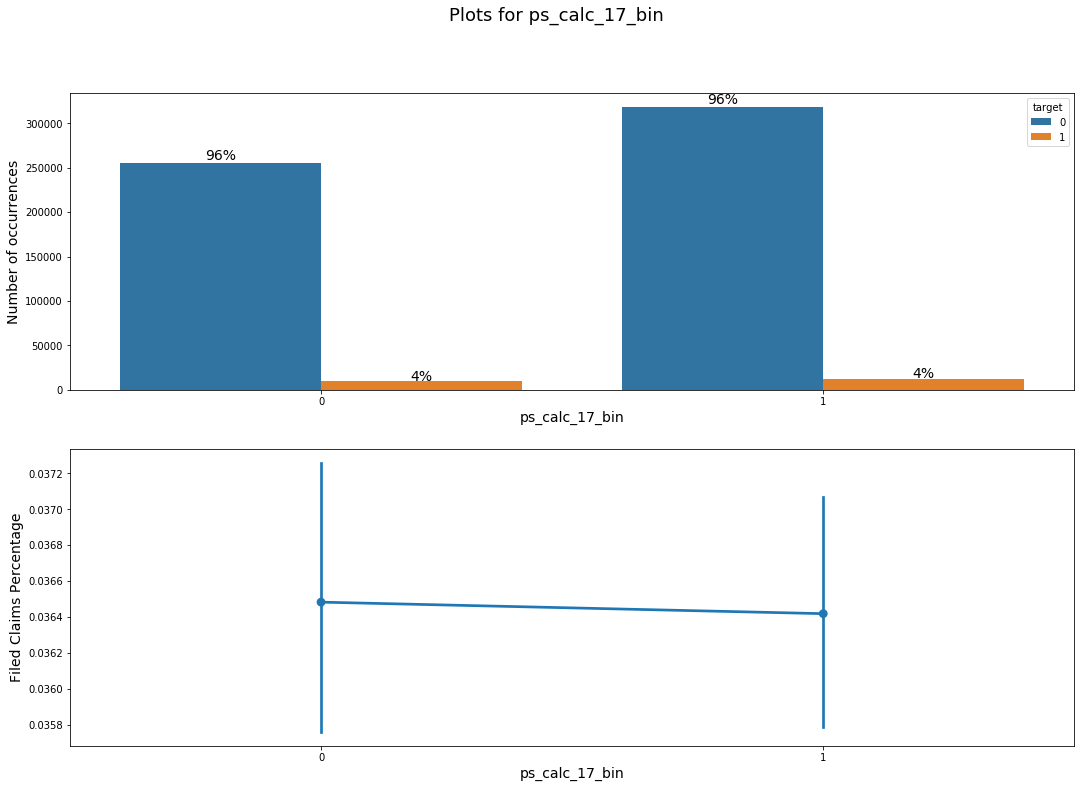

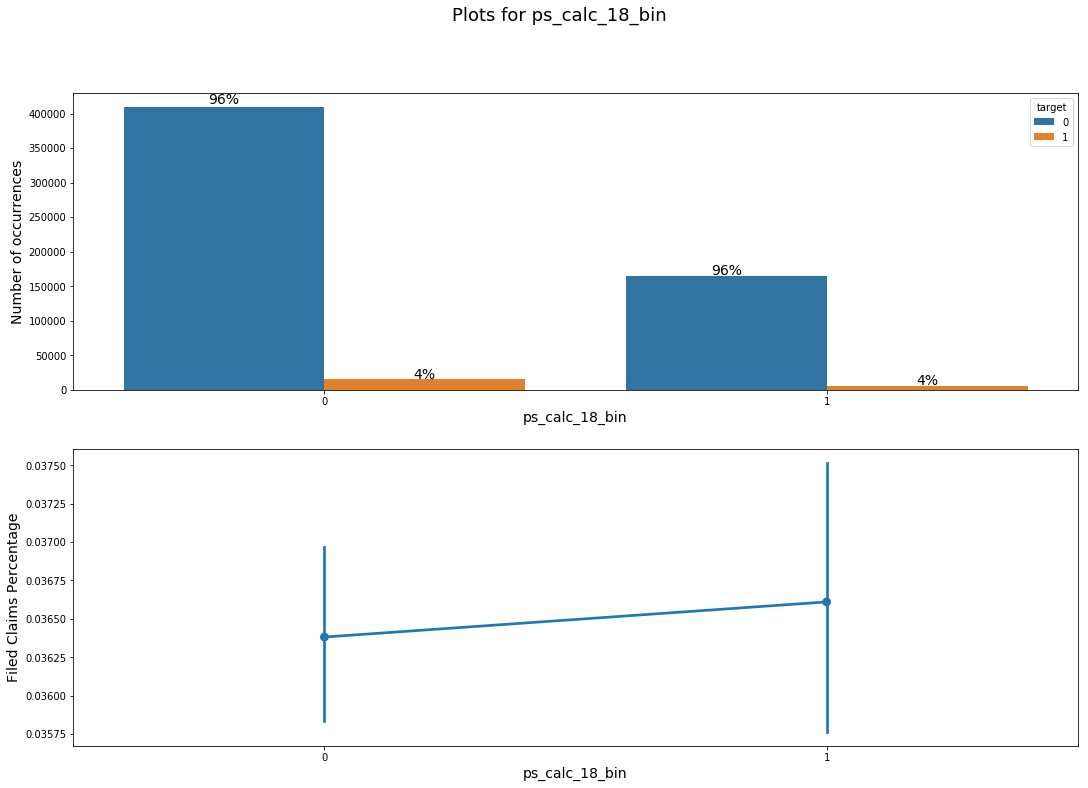

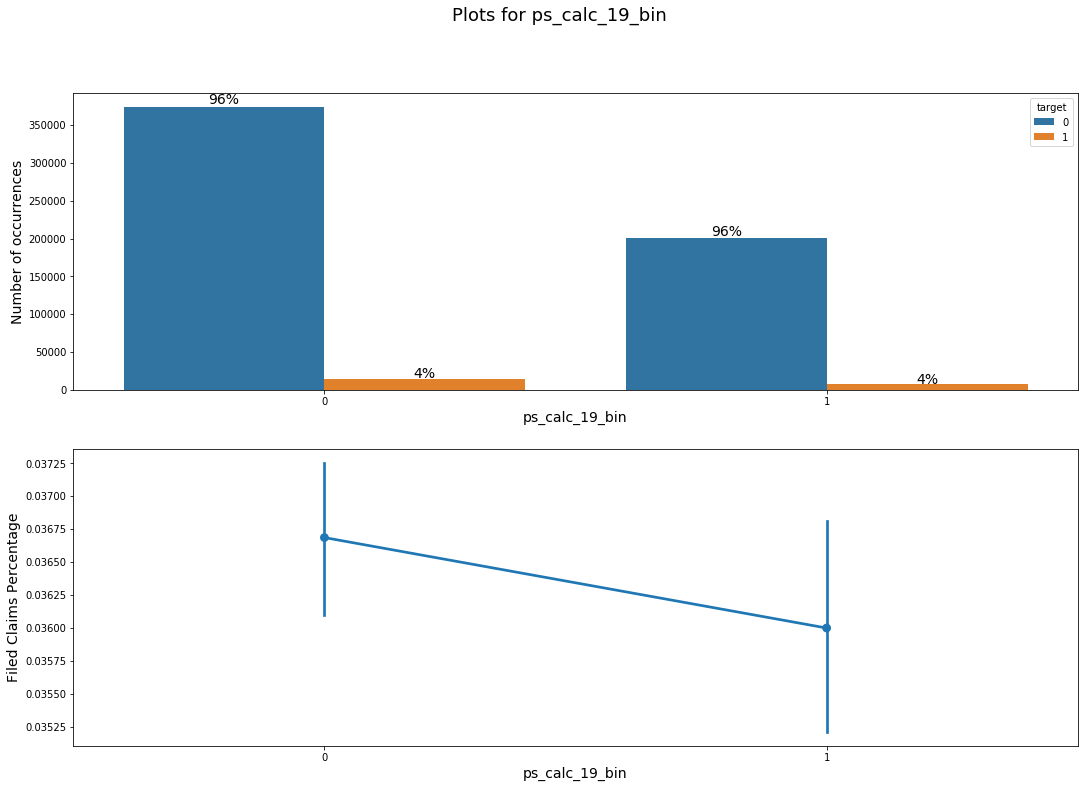

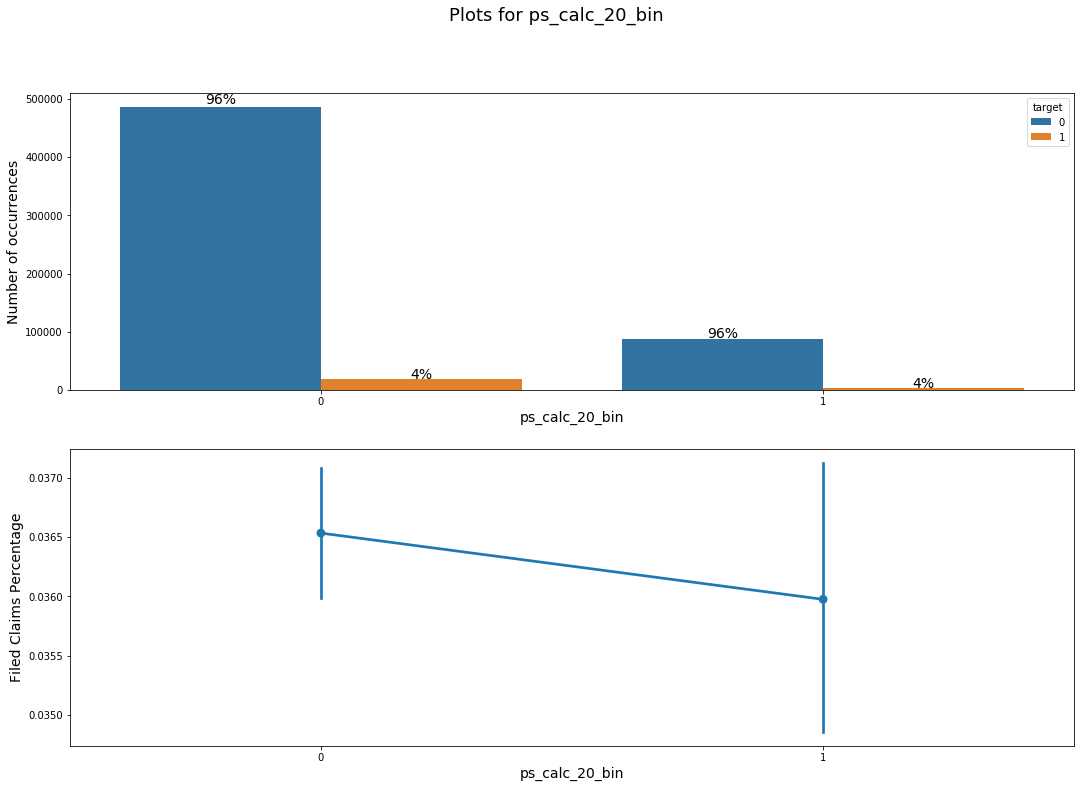

In [20]:
### Plotting Binary Features
for column in bf: 
    fig = plt.figure(figsize=(18,12))
    ### Number of occurrences per binary value - target pair
    ax = sb.countplot(x=column, hue="target", data=train, ax = plt.subplot(211));
    plt.xlabel(column, fontsize=14);
    plt.ylabel('Number of occurrences', fontsize=14)
    plt.suptitle('Plots for '+column, fontsize=18);
    
    ### Adding percents over bars
    # Getting heights of our bars
    h = [p.get_height() for p in ax.patches]
    # Counting number of bar groups 
    ncol = int(len(h)/2)
    # Counting total height of groups
    total = [h[i] + h[i + ncol] for i in range(ncol)] * 2
    # Looping through bars
    for i, p in enumerate(ax.patches):    
        # Adding percentages
        ax.text(p.get_x()+p.get_width()/2, h[i]*1.01 + 1000,
                '{:1.0%}'.format(h[i]/total[i]), ha="center", size=14) 
        

    ### Filed Claims percentage for every value of feature
    sb.pointplot(x=column, y='target', data=train, ax = plt.subplot(212));
    plt.xlabel(column, fontsize=14);
    plt.ylabel('Filed Claims Percentage', fontsize=14);
    plt.show()

In [21]:
train.corr()

id    target  ps_ind_01  ps_ind_02_cat  ps_ind_03  \
id              1.000000 -0.000188   0.000826       0.001646  -0.001307   
target         -0.000188  1.000000   0.018570       0.004534   0.008360   
ps_ind_01       0.000826  0.018570   1.000000      -0.001793   0.223408   
ps_ind_02_cat   0.001646  0.004534  -0.001793       1.000000  -0.061189   
ps_ind_03      -0.001307  0.008360   0.223408      -0.061189   1.000000   
ps_ind_04_cat   0.000168  0.009360   0.066645       0.147110  -0.095856   
ps_ind_05_cat   0.000022  0.029165   0.014823      -0.014860   0.053250   
ps_ind_06_bin  -0.000093 -0.034017  -0.277458      -0.125653  -0.045158   
ps_ind_07_bin   0.002473  0.034218   0.005700       0.016398  -0.060368   
ps_ind_08_bin  -0.000479  0.013147   0.188583       0.030945   0.014037   
ps_ind_09_bin  -0.002208 -0.008237   0.162800       0.110076   0.111306   
ps_ind_10_bin  -0.001261  0.001815   0.001847      -0.000744   0.006865   
ps_ind_11_bin  -0.001210  0.002028  -0.016727       0.000772  -0.003986   
ps_ind_12_bin  -0.000177  0.007810  -0.023406      -0.004616   0.001698   
ps_ind_13_bin  -0.001718  0.002460  -0.008776      -0.001187   0.003929   
ps_ind_14      -0.001129  0.007443  -0.024971      -0.003649   0.001990   
ps_ind_15      -0.001935 -0.021506   0.122137      -0.003854   0.170449   
ps_ind_16_bin  -0.000500 -0.027778   0.036896       0.012682  -0.018251   
ps_ind_17_bin   0.001344  0.037053   0.101257      -0.018727   0.027691   
ps_ind_18_bin   0.000816  0.004555  -0.112226      -0.000374   0.001316   
ps_reg_01      -0.000999  0.022888   0.102212       0.061118   0.003209   
ps_reg_02      -0.003829  0.034800   0.183855       0.084260   0.048338   
ps_reg_03      -0.000976  0.030888   0.139125       0.070790   0.002348   
ps_car_01_cat  -0.001052  0.016256  -0.056121       0.002149  -0.028520   
ps_car_02_cat  -0.000403 -0.031534  -0.116987       0.045233  -0.044907   
ps_car_03_cat   0.000354  0.032401   0.043756      -0.002532   0.095658   
ps_car_04_cat   0.002310  0.032900   0.079042      -0.072190   0.072990   
ps_car_05_cat  -0.000850  0.020754   0.213009      -0.008407   0.143597   
ps_car_06_cat  -0.001010  0.011537   0.070192      -0.017301   0.008021   
ps_car_07_cat  -0.002956 -0.036395  -0.000639      -0.011781   0.056337   
ps_car_08_cat   0.000748 -0.020342   0.138112       0.001526   0.003607   
ps_car_09_cat   0.000494  0.005322  -0.102582       0.009435  -0.013205   
ps_car_10_cat  -0.000928  0.001038   0.010794       0.011401  -0.008561   
ps_car_11_cat   0.002047  0.006129   0.008188       0.014955  -0.025966   
ps_car_11       0.002641 -0.001213   0.008252       0.019949  -0.059358   
ps_car_12       0.001007  0.038790   0.161842      -0.110247   0.088992   
ps_car_13       0.001944  0.053899   0.099752      -0.080408   0.048308   
ps_car_14      -0.000737 -0.004474   0.034480      -0.012272   0.000539   
ps_car_15       0.000709  0.027667  -0.056722      -0.008391  -0.048096   
ps_calc_01     -0.000331  0.001782  -0.000854       0.000683   0.000703   
ps_calc_02      0.000719  0.001360  -0.000437       0.000932  -0.000335   
ps_calc_03     -0.000451  0.001907   0.001214      -0.000322   0.000177   
ps_calc_04      0.003638  0.000033  -0.000943      -0.002111   0.000703   
ps_calc_05     -0.000592  0.000771  -0.001171      -0.001548  -0.001245   
ps_calc_06      0.000957  0.000082   0.000147       0.000085   0.002361   
ps_calc_07      0.000788 -0.000103  -0.000658      -0.000172   0.001533   
ps_calc_08      0.000836 -0.001006   0.002993      -0.002712   0.001267   
ps_calc_09      0.000518  0.000719  -0.000085       0.000356  -0.001544   
ps_calc_10      0.000981  0.001061  -0.001345      -0.000025   0.000230   
ps_calc_11     -0.001249  0.000371  -0.001263       0.000038  -0.002716   
ps_calc_12     -0.001093 -0.001133   0.001521      -0.000884  -0.002352   
ps_calc_13     -0.000157 -0.000446   0.000199      -0.000893   0.000133   
ps_calc_14      0.001609  0.001362  -0.000891  

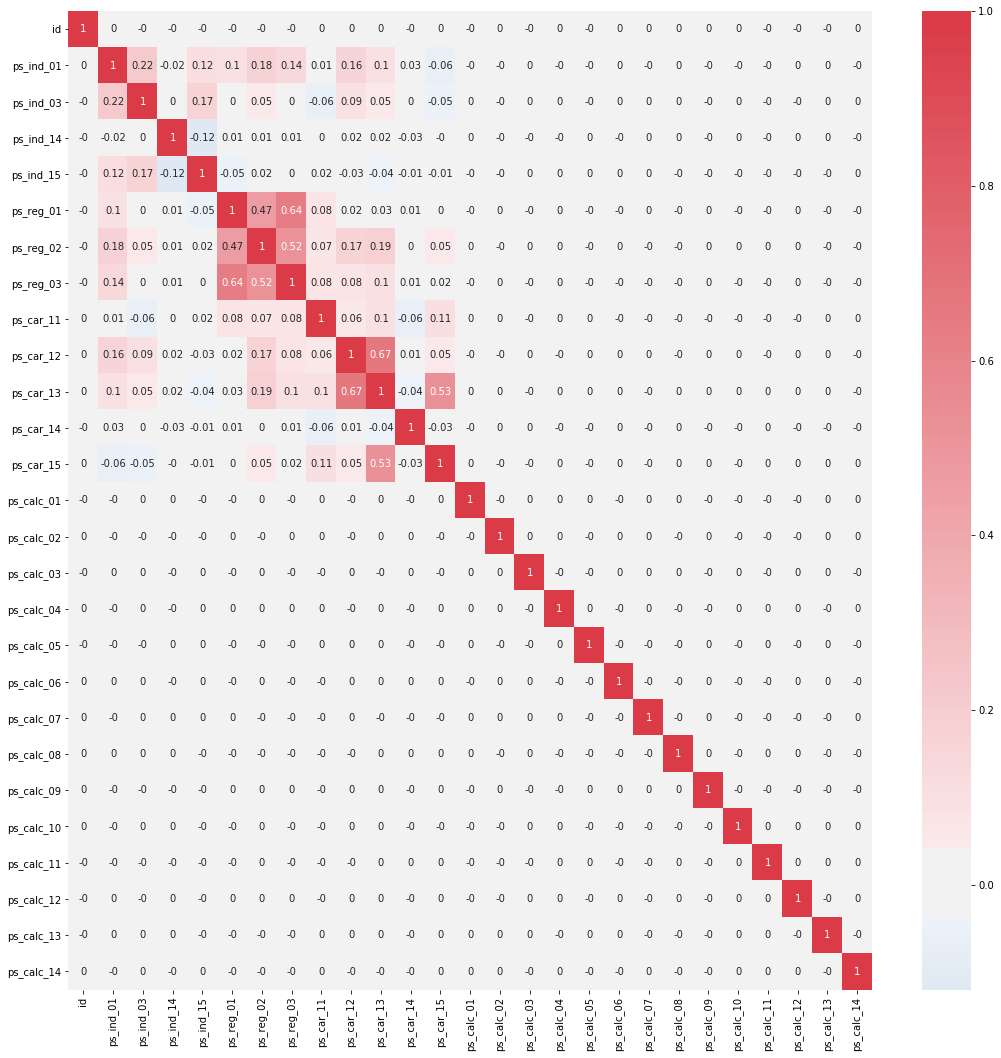

In [22]:
cm = train[nf].corr().round(2)
f = plt.figure(figsize=(18,18));
sb.heatmap(cm, annot=True, center=0, cmap = sb.diverging_palette(250, 10, as_cmap=True), ax=plt.subplot(111));
plt.show()

In [23]:
train.dtypes

id                  int64
target              int64
ps_ind_01           int64
ps_ind_02_cat       int64
ps_ind_03           int64
ps_ind_04_cat       int64
ps_ind_05_cat       int64
ps_ind_06_bin       int64
ps_ind_07_bin       int64
ps_ind_08_bin       int64
ps_ind_09_bin       int64
ps_ind_10_bin       int64
ps_ind_11_bin       int64
ps_ind_12_bin       int64
ps_ind_13_bin       int64
ps_ind_14           int64
ps_ind_15           int64
ps_ind_16_bin       int64
ps_ind_17_bin       int64
ps_ind_18_bin       int64
ps_reg_01         float64
ps_reg_02         float64
ps_reg_03         float64
ps_car_01_cat       int64
ps_car_02_cat       int64
ps_car_03_cat       int64
ps_car_04_cat       int64
ps_car_05_cat       int64
ps_car_06_cat       int64
ps_car_07_cat       int64
ps_car_08_cat       int64
ps_car_09_cat       int64
ps_car_10_cat       int64
ps_car_11_cat       int64
ps_car_11           int64
ps_car_12         float64
ps_car_13         float64
ps_car_14         float64
ps_car_15   

In [ ]:
train.target=train.target.astype("category")
train.ps_ind_02_cat=train.ps_ind_02_cat.astype("category")
train.ps_ind_04_cat=train.ps_ind_04_cat.astype("category")
train.ps_ind_05_cat=train.ps_ind_05_cat.astype("category")
train.ps_ind_06_bin=train.ps_ind_06_bin.astype("category")
train.ps_ind_07_bin=train.ps_ind_07_bin.astype("category")
train.ps_ind_08_bin=train.ps_ind_08_bin.astype("category")
train.ps_ind_09_bin=train.ps_ind_09_bin.astype("category")
train.ps_ind_10_bin=train.ps_ind_10_bin.astype("category")
train.ps_ind_11_bin=train.ps_ind_11_bin.astype("category")
train.ps_ind_12_bin=train.ps_ind_12_bin.astype("category")
train.ps_ind_13_bin=train.ps_ind_13_bin.astype("category")
train.ps_ind_16_bin=train.ps_ind_16_bin.astype("category")
train.ps_ind_17_bin=train.ps_ind_17_bin.astype("category")
train.ps_ind_18_bin=train.ps_ind_18_bin.astype("category")
train.ps_car_01_cat=train.ps_car_01_cat.astype("category")
train.ps_car_02_cat=train.ps_car_02_cat.astype("category")
train.ps_car_03_cat=train.ps_car_03_cat.astype("category")
train.ps_car_04_cat=train.ps_car_04_cat.astype("category")
train.ps_car_05_cat=train.ps_car_05_cat.astype("category")
train.ps_car_06_cat=train.ps_car_06_cat.astype("category")
train.ps_car_07_cat=train.ps_car_07_cat.astype("category")
train.ps_car_08_cat=train.ps_car_08_cat.astype("category")
train.ps_car_09_cat=train.ps_car_09_cat.astype("category")
train.ps_car_10_cat=train.ps_car_10_cat.astype("category")
train.ps_car_11_cat=train.ps_car_11_cat.astype("category")
train.ps_calc_15_bin=train.ps_calc_15_bin.astype("category")
train.ps_calc_16_bin=train.ps_calc_16_bin.astype("category")
train.ps_calc_17_bin=train.ps_calc_17_bin.astype("category")
train.ps_calc_18_bin=train.ps_calc_18_bin.astype("category")
train.ps_calc_19_bin=train.ps_calc_19_bin.astype("category")
train.ps_calc_20_bin=train.ps_calc_20_bin.astype("category")

In [24]:
train.dtypes

id                  int64
target              int64
ps_ind_01           int64
ps_ind_02_cat       int64
ps_ind_03           int64
ps_ind_04_cat       int64
ps_ind_05_cat       int64
ps_ind_06_bin       int64
ps_ind_07_bin       int64
ps_ind_08_bin       int64
ps_ind_09_bin       int64
ps_ind_10_bin       int64
ps_ind_11_bin       int64
ps_ind_12_bin       int64
ps_ind_13_bin       int64
ps_ind_14           int64
ps_ind_15           int64
ps_ind_16_bin       int64
ps_ind_17_bin       int64
ps_ind_18_bin       int64
ps_reg_01         float64
ps_reg_02         float64
ps_reg_03         float64
ps_car_01_cat       int64
ps_car_02_cat       int64
ps_car_03_cat       int64
ps_car_04_cat       int64
ps_car_05_cat       int64
ps_car_06_cat       int64
ps_car_07_cat       int64
ps_car_08_cat       int64
ps_car_09_cat       int64
ps_car_10_cat       int64
ps_car_11_cat       int64
ps_car_11           int64
ps_car_12         float64
ps_car_13         float64
ps_car_14         float64
ps_car_15   

In [25]:
train.describe()

id         target      ps_ind_01  ps_ind_02_cat  \
count  5.952120e+05  595212.000000  595212.000000  595212.000000   
mean   7.438036e+05       0.036448       1.900378       1.358943   
std    4.293678e+05       0.187401       1.983789       0.664594   
min    7.000000e+00       0.000000       0.000000      -1.000000   
25%    3.719915e+05       0.000000       0.000000       1.000000   
50%    7.435475e+05       0.000000       1.000000       1.000000   
75%    1.115549e+06       0.000000       3.000000       2.000000   
max    1.488027e+06       1.000000       7.000000       4.000000   

           ps_ind_03  ps_ind_04_cat  ps_ind_05_cat  ps_ind_06_bin  \
count  595212.000000  595212.000000  595212.000000  595212.000000   
mean        4.423318       0.416794       0.405188       0.393742   
std         2.699902       0.493311       1.350642       0.488579   
min         0.000000      -1.000000      -1.000000       0.000000   
25%         2.000000       0.000000       0.000000       0.000000   
50%         4.000000       0.000000       0.000000       0.000000   
75%         6.000000       1.000000       0.000000       1.000000   
max        11.000000       1.000000       6.000000       1.000000   

       ps_ind_07_bin  ps_ind_08_bin       ...           ps_calc_11  \
count  595212.000000  595212.000000       ...        595212.000000   
mean        0.257033       0.163921       ...             5.441382   
std         0.436998       0.370205       ...             2.332871   
min         0.000000       0.000000       ...             0.000000   
25%         0.000000       0.000000       ...             4.000000   
50%         0.000000       0.000000       ...             5.000000   
75%         1.000000       0.000000       ...             7.000000   
max         1.000000       1.000000       ...            19.000000   

          ps_calc_12     ps_calc_13     ps_calc_14  ps_calc_15_bin  \
count  595212.000000  595212.000000  595212.000000   595212.000000   
mean        1.441918       2.872288       7.539026        0.122427   
std         1.202963       1.694887       2.746652        0.327779   
min         0.000000       0.000000       0.000000        0.000000   
25%         1.000000       2.000000       6.000000        0.000000   
50%         1.000000       3.000000       7.000000        0.000000   
75%         2.000000       4.000000       9.000000        0.000000   
max        10.000000      13.000000      23.000000        1.000000   

       ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
count   595212.000000   595212.000000   595212.000000   595212.000000   
mean         0.627840        0.554182        0.287182        0.349024   
std          0.483381        0.497056        0.452447        0.476662   
min          0.000000        0.000000        0.000000        0.000000   
25%          0.000000        0.000000        0.000000        0.000000   
50%          1.000000        1.000000        0.000000        0.000000   
75%          1.000000        1.000000        1.000000        1.000000   
max          1.000000        1.000000        1.000000        1.000000   

       ps_calc_20_bin  
count   595212.000000  
mean         0.153318  
std          0.360295  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          0.000000  
max          1.000000  

[8 rows x 59 columns]

In [26]:
pd.value_counts(train['ps_car_03_cat'].values, sort=False)

 0     73272
 1    110709
-1    411231
dtype: int64

In [27]:
pd.value_counts(train['ps_ind_02_cat'].values,sort=False)

 1    431859
 2    123573
 3     28186
 4     11378
-1       216
dtype: int64

In [28]:
train = pd.DataFrame(train.replace(-1,np.nan))

In [29]:
train

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
0             7       0          2            2.0          5            1.0   
1             9       0          1            1.0          7            0.0   
2            13       0          5            4.0          9            1.0   
3            16       0          0            1.0          2            0.0   
4            17       0          0            2.0          0            1.0   
5            19       0          5            1.0          4            0.0   
6            20       0          2            1.0          3            1.0   
7            22       0          5            1.0          4            0.0   
8            26       0          5            1.0          3            1.0   
9            28       1          1            1.0          2            0.0   
10           34       0          5            2.0          2            0.0   
11           35       0          2            1.0          3            1.0   
12           36       0          2            1.0          1            1.0   
13           43       0          1            1.0          3            1.0   
14           46       0          5            1.0         11            0.0   
15           48       0          5            1.0          3            1.0   
16           50       0          1            2.0          1            0.0   
17           58       0          5            1.0          6            0.0   
18           61       0          5            1.0          8            0.0   
19           64       1          0            1.0          2            1.0   
20           65       0          0            1.0          2            0.0   
21           66       0          0            1.0          5            1.0   
22           72       0          5            3.0          6            1.0   
23           74       0          2            1.0          2            1.0   
24           77       0          0            1.0          2            0.0   
25           78       0          0            1.0          7            0.0   
26           79       0          0            1.0          4            1.0   
27           80       0          4            1.0          6            0.0   
28           84       1          0            2.0          0            1.0   
29           85       0          3            2.0          2            0.0   
...         ...     ...        ...            ...        ...            ...   
595182  1487945       0          0            1.0          2            0.0   
595183  1487951       0          1            1.0          9            0.0   
595184  1487952       0          1            1.0          5            0.0   
595185  1487954       0          0            2.0          8            1.0   
595186  1487957       0          0            1.0          3            1.0   
595187  1487958       0          0            1.0          7            0.0   
595188  1487962       0          2            1.0          3            0.0   
595189  1487963       0          3            1.0          9            0.0   
595190  1487964       0          1            2.0          3            0.0   
595191  1487968       0          5            1.0          3            0.0   
595192  1487973       0          0            1.0          1            0.0   
595193  1487975       0          0            2.0          0            0.0   
595194  1487976       0          0            1.0          7            1.0   
595195  1487980       0          0            3.0          3            1.0   
595196  1487983       0          1            1.0          2            0.0   
595197  1487988       0          1            1.0          7            1.0   
595198  1487990       0          5            1.0          7            1.0   
595199  1487992       0          3            1.0          3            1.0   
595200  1487994       0          1            1.0          1   

In [30]:
train.isnull().sum()

id                     0
target                 0
ps_ind_01              0
ps_ind_02_cat        216
ps_ind_03              0
ps_ind_04_cat         83
ps_ind_05_cat       5809
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin          0
ps_ind_09_bin          0
ps_ind_10_bin          0
ps_ind_11_bin          0
ps_ind_12_bin          0
ps_ind_13_bin          0
ps_ind_14              0
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_18_bin          0
ps_reg_01              0
ps_reg_02              0
ps_reg_03         107772
ps_car_01_cat        107
ps_car_02_cat          5
ps_car_03_cat     411231
ps_car_04_cat          0
ps_car_05_cat     266551
ps_car_06_cat          0
ps_car_07_cat      11489
ps_car_08_cat          0
ps_car_09_cat        569
ps_car_10_cat          0
ps_car_11_cat          0
ps_car_11              5
ps_car_12              1
ps_car_13              0
ps_car_14          42620
ps_car_15              0
ps_calc_01             0


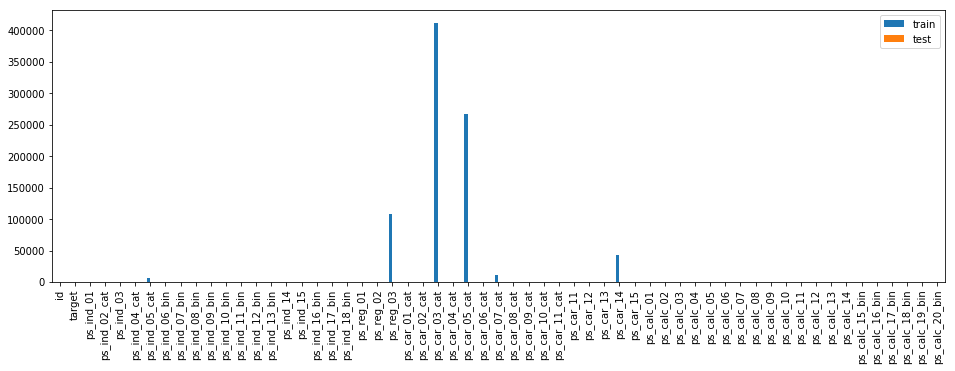

In [31]:
mv= pd.DataFrame()
mv['train']= train.isnull().sum()
mv['test'] = test.isnull().sum()
fig,ax = plt.subplots(figsize=(16,5))
mv.plot(kind='bar',ax=ax)

In [32]:
mssno.bar(train,color='y',figsize=(16,4),fontsize=12)

UnboundLocalError: local variable 'ax2' referenced before assignment

In [34]:
mssno.matrix(train)

In [35]:
train = pd.DataFrame(train.replace(np.nan,0))

In [36]:
train.isnull().sum()

id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0


In [37]:
train.describe()

id         target      ps_ind_01  ps_ind_02_cat  \
count  5.952120e+05  595212.000000  595212.000000  595212.000000   
mean   7.438036e+05       0.036448       1.900378       1.359306   
std    4.293678e+05       0.187401       1.983789       0.663578   
min    7.000000e+00       0.000000       0.000000       0.000000   
25%    3.719915e+05       0.000000       0.000000       1.000000   
50%    7.435475e+05       0.000000       1.000000       1.000000   
75%    1.115549e+06       0.000000       3.000000       2.000000   
max    1.488027e+06       1.000000       7.000000       4.000000   

           ps_ind_03  ps_ind_04_cat  ps_ind_05_cat  ps_ind_06_bin  \
count  595212.000000  595212.000000  595212.000000  595212.000000   
mean        4.423318       0.416934       0.414948       0.393742   
std         2.699902       0.493052       1.344050       0.488579   
min         0.000000       0.000000       0.000000       0.000000   
25%         2.000000       0.000000       0.000000       0.000000   
50%         4.000000       0.000000       0.000000       0.000000   
75%         6.000000       1.000000       0.000000       1.000000   
max        11.000000       1.000000       6.000000       1.000000   

       ps_ind_07_bin  ps_ind_08_bin       ...           ps_calc_11  \
count  595212.000000  595212.000000       ...        595212.000000   
mean        0.257033       0.163921       ...             5.441382   
std         0.436998       0.370205       ...             2.332871   
min         0.000000       0.000000       ...             0.000000   
25%         0.000000       0.000000       ...             4.000000   
50%         0.000000       0.000000       ...             5.000000   
75%         1.000000       0.000000       ...             7.000000   
max         1.000000       1.000000       ...            19.000000   

          ps_calc_12     ps_calc_13     ps_calc_14  ps_calc_15_bin  \
count  595212.000000  595212.000000  595212.000000   595212.000000   
mean        1.441918       2.872288       7.539026        0.122427   
std         1.202963       1.694887       2.746652        0.327779   
min         0.000000       0.000000       0.000000        0.000000   
25%         1.000000       2.000000       6.000000        0.000000   
50%         1.000000       3.000000       7.000000        0.000000   
75%         2.000000       4.000000       9.000000        0.000000   
max        10.000000      13.000000      23.000000        1.000000   

       ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
count   595212.000000   595212.000000   595212.000000   595212.000000   
mean         0.627840        0.554182        0.287182        0.349024   
std          0.483381        0.497056        0.452447        0.476662   
min          0.000000        0.000000        0.000000        0.000000   
25%          0.000000        0.000000        0.000000        0.000000   
50%          1.000000        1.000000        0.000000        0.000000   
75%          1.000000        1.000000        1.000000        1.000000   
max          1.000000        1.000000        1.000000        1.000000   

       ps_calc_20_bin  
count   595212.000000  
mean         0.153318  
std          0.360295  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          0.000000  
max          1.000000  

[8 rows x 59 columns]

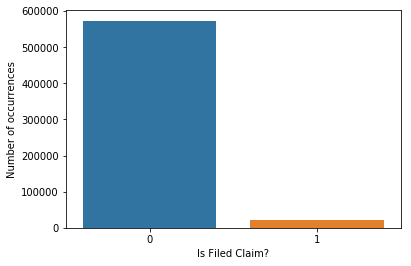

In [38]:
sb.countplot(train.target)
plt.xlabel('Is Filed Claim?')
plt.ylabel('Number of occurrences')
plt.show()

In [39]:
X=train.drop(["target"],axis=1)

In [40]:
Y=train['target']

In [41]:
Y.dtypes

dtype('int64')

In [42]:
X

id  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
0             7          2            2.0          5            1.0   
1             9          1            1.0          7            0.0   
2            13          5            4.0          9            1.0   
3            16          0            1.0          2            0.0   
4            17          0            2.0          0            1.0   
5            19          5            1.0          4            0.0   
6            20          2            1.0          3            1.0   
7            22          5            1.0          4            0.0   
8            26          5            1.0          3            1.0   
9            28          1            1.0          2            0.0   
10           34          5            2.0          2            0.0   
11           35          2            1.0          3            1.0   
12           36          2            1.0          1            1.0   
13           43          1            1.0          3            1.0   
14           46          5            1.0         11            0.0   
15           48          5            1.0          3            1.0   
16           50          1            2.0          1            0.0   
17           58          5            1.0          6            0.0   
18           61          5            1.0          8            0.0   
19           64          0            1.0          2            1.0   
20           65          0            1.0          2            0.0   
21           66          0            1.0          5            1.0   
22           72          5            3.0          6            1.0   
23           74          2            1.0          2            1.0   
24           77          0            1.0          2            0.0   
25           78          0            1.0          7            0.0   
26           79          0            1.0          4            1.0   
27           80          4            1.0          6            0.0   
28           84          0            2.0          0            1.0   
29           85          3            2.0          2            0.0   
...         ...        ...            ...        ...            ...   
595182  1487945          0            1.0          2            0.0   
595183  1487951          1            1.0          9            0.0   
595184  1487952          1            1.0          5            0.0   
595185  1487954          0            2.0          8            1.0   
595186  1487957          0            1.0          3            1.0   
595187  1487958          0            1.0          7            0.0   
595188  1487962          2            1.0          3            0.0   
595189  1487963          3            1.0          9            0.0   
595190  1487964          1            2.0          3            0.0   
595191  1487968          5            1.0          3            0.0   
595192  1487973          0            1.0          1            0.0   
595193  1487975          0            2.0          0            0.0   
595194  1487976          0            1.0          7            1.0   
595195  1487980          0            3.0          3            1.0   
595196  1487983          1            1.0          2            0.0   
595197  1487988          1            1.0          7            1.0   
595198  1487990          5            1.0          7            1.0   
595199  1487992          3            1.0          3            1.0   
595200  1487994          1            1.0          1            0.0   
595201  1487996          0            2.0          2            1.0   
595202  1488001          4            1.0          3            0.0   
595203  1488005          3            2.0          3            1.0   
595204  1488008          1            2.0          2            1.0   
595205  1488009          0            3.0          6            1.0   
595206  1488011          0           

In [43]:
X.isnull().sum()

id                0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0
ps_calc_12        0


In [44]:
Y

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         1
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        1
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        1
29        0
         ..
595182    0
595183    0
595184    0
595185    0
595186    0
595187    0
595188    0
595189    0
595190    0
595191    0
595192    0
595193    0
595194    0
595195    0
595196    0
595197    0
595198    0
595199    0
595200    0
595201    0
595202    0
595203    0
595204    0
595205    0
595206    0
595207    0
595208    0
595209    0
595210    0
595211    0
Name: target, Length: 595212, dtype: int64

In [45]:
Y.isnull().sum()

0

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
X = StandardScaler().fit_transform(X)

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.30,random_state=42)

In [50]:
X.shape

(595212, 58)

In [51]:
X_train.shape

(416648, 58)

In [52]:
X_test.shape

(178564, 58)

In [53]:
Y_train.shape

(416648,)

In [54]:
Y_test.shape

(178564,)

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
clf = RandomForestClassifier(max_depth=10,min_samples_leaf=5,max_features=None, class_weight="balanced",max_leaf_nodes=500)

In [57]:
clf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=10, max_features=None,
            max_leaf_nodes=500, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [58]:
preds = clf.predict(X_test)

In [59]:
from sklearn.metrics import confusion_matrix,classification_report

In [60]:
confusion_matrix(Y_test,preds)

array([[133427,  38552],
       [  4179,   2406]], dtype=int64)

In [61]:
print(classification_report(Y_test,preds))

             precision    recall  f1-score   support

          0       0.97      0.78      0.86    171979
          1       0.06      0.37      0.10      6585

avg / total       0.94      0.76      0.83    178564



In [62]:
import xgboost as xgb

In [63]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [64]:
from sklearn.metrics import make_scorer

In [65]:
from sklearn import pipeline, metrics, grid_search

C:\Users\raksh\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\raksh\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [66]:
def gini(truth, predictions):
    g = np.asarray(np.c_[truth, predictions, np.arange(len(truth)) ], dtype=np.float)
    g = g[np.lexsort((g[:,2], -1*g[:,1]))]
    gs = g[:,0].cumsum().sum() / g[:,0].sum()
    gs -= (len(truth) + 1) / 2.
    return gs / len(truth)

In [67]:
def gini_xgb(predictions, truth):
    truth = truth.get_label()
    return 'gini', -1.0 * gini(truth, predictions) / gini(truth, truth)

In [68]:
def gini_lgb(truth, predictions):
    score = gini(truth, predictions) / gini(truth, truth)
    return 'gini', score, True

In [69]:
def gini_sklearn(truth, predictions):
    return gini(truth, predictions) / gini(truth, truth)

In [70]:
gini_scorer = make_scorer(gini_sklearn, greater_is_better=True, needs_proba=True)

In [71]:
def objective(params):
    params = {'n_estimators': int(params['n_estimators']), 'max_depth': int(params['max_depth'])}
    clf = RandomForestClassifier(n_jobs=4, class_weight='balanced', **params)
    score = cross_val_score(clf, X, Y, scoring=gini_scorer, cv=StratifiedKFold()).mean()
    print("Gini {:.3f} params {}".format(score, params))
    return score

In [76]:
space = {
    'n_estimators': hp.quniform('n_estimators', 25, 500, 25),
    'max_depth': hp.quniform('max_depth', 1, 10, 1)
}

In [77]:
best1 = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=10)

Gini -0.249 params {'n_estimators': 225, 'max_depth': 8}
Gini -0.240 params {'n_estimators': 175, 'max_depth': 9}
Gini -0.216 params {'n_estimators': 275, 'max_depth': 1}
Gini -0.248 params {'n_estimators': 50, 'max_depth': 6}
Gini -0.229 params {'n_estimators': 400, 'max_depth': 2}
Gini -0.245 params {'n_estimators': 125, 'max_depth': 5}
Gini -0.243 params {'n_estimators': 500, 'max_depth': 9}
Gini -0.229 params {'n_estimators': 250, 'max_depth': 2}
Gini -0.241 params {'n_estimators': 75, 'max_depth': 4}
Gini -0.237 params {'n_estimators': 450, 'max_depth': 3}


In [78]:
print("Hyperopt estimated optimum {}".format(best1))

Hyperopt estimated optimum {'max_depth': 8.0, 'n_estimators': 225.0}


In [79]:
def objective(params):
    params = {
        'max_depth': int(params['max_depth']),
        'gamma': "{:.3f}".format(params['gamma']),
        'colsample_bytree': '{:.3f}'.format(params['colsample_bytree']),
    }
    
    classifier = xgb.XGBClassifier(n_estimators=250,learning_rate=0.05,**params)
    
    score = cross_val_score(classifier, X, Y, scoring=gini_scorer, cv=StratifiedKFold()).mean()
    print("Gini {:.3f} params {}".format(score, params))
    return score

In [80]:
from hyperopt import hp, tpe

In [81]:
from hyperopt.fmin import fmin

In [82]:
space = {
    'max_depth': hp.quniform('max_depth', 2, 8, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 1.0),
    'gamma': hp.uniform('gamma', 0.0, 0.5),
}

In [83]:
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=10)

Gini -0.140 params {'max_depth': 7, 'gamma': '0.188', 'colsample_bytree': '0.452'}
Gini -0.139 params {'max_depth': 3, 'gamma': '0.289', 'colsample_bytree': '0.710'}
Gini -0.151 params {'max_depth': 5, 'gamma': '0.121', 'colsample_bytree': '0.402'}
Gini -0.134 params {'max_depth': 4, 'gamma': '0.290', 'colsample_bytree': '0.945'}
Gini -0.111 params {'max_depth': 8, 'gamma': '0.370', 'colsample_bytree': '0.705'}
Gini -0.161 params {'max_depth': 3, 'gamma': '0.337', 'colsample_bytree': '0.940'}
Gini -0.207 params {'max_depth': 3, 'gamma': '0.406', 'colsample_bytree': '0.344'}
Gini -0.108 params {'max_depth': 7, 'gamma': '0.178', 'colsample_bytree': '0.681'}
Gini -0.095 params {'max_depth': 6, 'gamma': '0.267', 'colsample_bytree': '0.717'}
Gini -0.139 params {'max_depth': 4, 'gamma': '0.239', 'colsample_bytree': '0.995'}


In [84]:
print("Hyperopt estimated optimum {}".format(best))

Hyperopt estimated optimum {'colsample_bytree': 0.3442296588061848, 'gamma': 0.40640622025465195, 'max_depth': 3.0}


In [85]:
import lightgbm as lgbm

In [86]:
def objective(params):
    params = {
        'num_leaves': int(params['num_leaves']),
        'colsample_bytree': '{:.3f}'.format(params['colsample_bytree']),
    }
    
    classifier1 = lgbm.LGBMClassifier(
        n_estimators=500,
        learning_rate=0.01,
        **params
    )
    
    score = cross_val_score(classifier1, X, Y, scoring=gini_scorer, cv=StratifiedKFold()).mean()
    print("Gini {:.3f} params {}".format(score, params))
    return score

In [87]:
space = {
    'num_leaves': hp.quniform('num_leaves', 8, 128, 2),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 1.0),
}

In [88]:
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=10)

Gini -0.261 params {'num_leaves': 12, 'colsample_bytree': '0.989'}
Gini -0.263 params {'num_leaves': 52, 'colsample_bytree': '0.829'}
Gini -0.259 params {'num_leaves': 70, 'colsample_bytree': '0.933'}
Gini -0.263 params {'num_leaves': 28, 'colsample_bytree': '0.862'}
Gini -0.265 params {'num_leaves': 112, 'colsample_bytree': '0.617'}
Gini -0.266 params {'num_leaves': 72, 'colsample_bytree': '0.465'}
Gini -0.264 params {'num_leaves': 58, 'colsample_bytree': '0.756'}
Gini -0.261 params {'num_leaves': 80, 'colsample_bytree': '0.885'}
Gini -0.262 params {'num_leaves': 60, 'colsample_bytree': '0.895'}
Gini -0.266 params {'num_leaves': 80, 'colsample_bytree': '0.379'}


In [89]:
print("Hyperopt estimated optimum {}".format(best))

Hyperopt estimated optimum {'colsample_bytree': 0.46545176133091126, 'num_leaves': 72.0}
